**CAPSTONE MODUL 2 : ONLINE RETAIL SHIPPING - ALIFIA LISTU SAMATHA - JCDS BANDUNG**

****
# **Daftar Isi**
****
1. [Latar Belakang](#latar-belakang)
2. [Pernyataan Masalah](#pernyataan-masalah)
3. [Load Dataset](#load-dataset)
4. [Data Understanding & Cleaning](#data-understanding--cleaning)
   1. [Pemahaman Data](#pemahaman-data)
   2. [Drop Kolom ID](#drop-kolom-id)
   3. [Kemungkinan Salah Input - Gudang F](#kemungkinan-salah-input---gudang-f)
   4. [Distribusi Data & Deteksi Outlier](#distribusi-data--deteksi-outlier)
   5. [Menangani Outlier](#menangani-outlier)
   6. [Pengelompokan Data](#pengelompokan-data)
5. [Data Analisis](#data-analisis)
   1. [Eksplorasi Kolom Kategorikal](#eksplorasi-kolom-kategorikal)
   2. [Analisis Waktu Pengiriman](#analisis-waktu-pengiriman)
   3. [Analisis Kepentingan/Urgensi Produk](#analisis-kepentinganurgensi-produk)
   4. [Analisis Biaya Produk dan Mode Pengiriman](#analisis-biaya-produk-dan-mode-pengiriman)
   5. [Analisis Segmentasi Pelanggan](#analisis-segmentasi-pelanggan)
   6. [Analisis Panggilan Layanan Pelanggan](#analisis-panggilan-layanan-pelanggan)
6. [Kesimpulan](#kesimpulan)
7. [Rekomendasi](#rekomendasi)

****
# **Latar Belakang**
****

Perusahaan E-Commerce Internasional di bidang elektronik bekerja sama dengan data analyst untuk menganalisa data pengiriman produk pelanggan, dimana dari banyak data pengiriman produk, beberapa pengiriman tidak tiba tepat waktu atau tertunda, sehingga banyak pelanggan yang memberikan peringkat rendah kepada perusahaan. Hal ini akan berdampak buruk untuk reputasi perusahaan yang dapat mengakibatkan pelanggan tidak percaya lagi dengan perusahaan dan perusahaan akan mengalami kebangkrutan.

****
# **Pernyataan Masalah**
****

Perusahaan ingin mengetahui apakah produk yang dibeli pelanggan sampai kepada pelanggan tepat waktu atau tidak. Analisis ini nantinya dapat membantu perusahaan untuk menentukan langkah yang harus dilakukan untuk memecahkan masalah.

Berikut ini adalah pertanyaan yang akan dijawab dalam analis dibawah ini:
1. Apakah produk sampai tepat waktu?
2. Apa yang harus dilakukan untuk meningkatkan kemungkinan produk sampai tepat waktu?
3. Apakah penilaian pelanggan sudah bagus?
4. Apa yang harus dilakukan untuk meningkatkan penilaian pelanggan?


****
# **Load Dataset**
****
Untuk menjawab pertanyaan di atas, kami akan menganalisis data pengiriman produk yang dikumpulkan oleh perusahaan. Dataset dapat ditemukan [<font color='#B85048'><u>disini</u>](https://drive.google.com/file/d/1LiIEty4z_jZSIV7CvsNjMTpQuuAdDDha/view?usp=sharing)</font>.

In [2]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import dataset
df = pd.read_csv('Online Retail Shipping.csv')

Dataset ini berisi informasi tentang detail pengiriman produk pelanggan. Dataset pengiriman retail online memiliki 12 kolom, yaitu sebagai berikut:

| No | Nama Kolom          | Deskripsi                                                                                              |
|----|---------------------|--------------------------------------------------------------------------------------------------------|
| 1  | ID                  | Nomor ID Pelanggan                                                                                     |
| 2  | Warehouse Block     | Perusahaan memiliki gudang besar yang terbagi dalam blok (A-E).                                        |
| 3  | Mode of Shipment    | Perusahaan mengirimkan produk dengan berbagai cara (Ship, Flight, dan Road).                           |
| 4  | Customer Care Calls | Jumlah panggilan yang dilakukan untuk pertanyaan terkait pengiriman.                                   |
| 5  | Customer Rating     | Nilai dari setiap pelanggan. 1 adalah yang terendah, dan 5 adalah yang tertinggi.                      |
| 6  | Cost of The Product | Biaya produk dalam US Dollar                                                                           |
| 7  | Prior Purchases     | Jumlah pembelian sebelumnya.                                                                           |
| 8  | Product Importance  | Perusahaan telah mengkategorikan produk dalam berbagai parameter (low, medium, high).                  |
| 9  | Gender              | Pria dan Wanita.                                                                                       |
| 10 | Discount Offered    | Diskon yang ditawarkan pada produk tertentu.                                                           |
| 11 | Weight in gms       | Berat dalam gram.                                                                                      |
| 12 | Reached On Time     | 1 berarti produk tidak sampai tepat waktu, dan 0 berarti produk sampai tepat waktu.                    |

In [4]:
# menampilkan 5 data teratas dan terbawah
display(df.head(),df.tail())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


****
# **Data Understanding & Cleaning**
****
Pada tahap pemahaman data, kita perlu mengenal dataset kita lebih baik sebelum melanjutkan ke analisis. Proses ini akan mengungkapkan anomali mana yang ada di dataset ini dan mana yang harus ditangani selama tahap pembersihan data. Setiap penangan anomali akan disertai dengan justifikasi atas langkah yang diambil, baik dalam pengetahuan domain maupun secara statistik.

### **Pemahaman Data**

In [5]:
# informasi dataframe
def summary(df):
  types = df.dtypes
  counts = df.apply(lambda x: x.count())
  nuniques = df.apply(lambda x: x.unique().shape[0])
  nulls = df.apply(lambda x: x.isnull().sum())
  print('Data Shape:', df.shape)
  uniques = df.apply(lambda x: x.unique())

  column = ['Dtype', 'Counts', 'Nulls', 'Num of Uniques', 'Unique Values']
  str = pd.concat([types, counts, nulls, nuniques, uniques], axis = 1, sort=True)

  str.columns = column
  print('___________________________\nData Types:')
  print(str.Dtype.value_counts())
  print('___________________________')
  return str

details = summary(df)
display(details.sort_values(by='Nulls', ascending=False))

Data Shape: (10999, 12)
___________________________
Data Types:
Dtype
int64     8
object    4
Name: count, dtype: int64
___________________________


,Dtype,Counts,Nulls,Num of Uniques,Unique Values
Cost_of_the_Product,int64,10999,0,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, ..."
Customer_care_calls,int64,10999,0,6,"[4, 2, 3, 5, 6, 7]"
Customer_rating,int64,10999,0,5,"[2, 5, 3, 1, 4]"
Discount_offered,int64,10999,0,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43,..."
Gender,object,10999,0,2,"[F, M]"
ID,int64,10999,0,10999,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Mode_of_Shipment,object,10999,0,3,"[Flight, Ship, Road]"
Prior_purchases,int64,10999,0,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
Product_importance,object,10999,0,3,"[low, medium, high]"
Reached.on.Time_Y.N,int64,10999,0,2,"[1, 0]"


In [6]:
# cek duplikat
df.duplicated().sum()

0

In [7]:
# deskriptif statistik
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [8]:
# deskriptif statistik kategorikal
df.describe(include=object)

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


**Penjelasan**
- Dataset pengiriman retail online memiliki 12 kolom dan 10999 baris.
- Tidak ada kolom yang memiliki missing values atau duplikat.
- Nilai min/maks masih dalam batas wajar mean/median pada variabel untuk masing-masing kolom.
- Kolom `ID` berisi id unik untuk setiap pelanggan, tidak relevan dengan analisis karena memiliki value yang sama dengan index dan dapat dihapus.
- **Blok F** mendominasi kolom `Warehouse_block` dengan total 3666.
- **Wanita (Female)** mendominasi kolom `Gender`, dengan total 5545.
- Kategori **Rendah (Low)** mendominasi kolom `Product_importance`, dengan total 5297.
- Pengiriman dengan kapal mendominasi kolom `Mode_of_shipment` dengan total 7462.
- Diketahui bahwa ada lima jenis `Warehouse_block` (A-E). Namun di data ada gudang F. Kemungkinan adanya kesalahan dalam penginputan data. Mari selidiki lebih lanjut.

### **Drop Kolom ID**

In [9]:
df.drop(columns='ID', inplace=True)

### **Kemungkinan Salah Input - Gudang F**

Mari kita lihat apakah pengguna tidak sengaja masuk gudang E sebagai gudang F, atau ada kemungkinan lain.

In [10]:
df['Warehouse_block'].value_counts()

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

In [11]:
df[df['Warehouse_block'] == 'D'].duplicated().sum()

0

In [12]:
df[df['Warehouse_block'] == 'F'].duplicated().sum()

0

In [13]:
len(df[df['Warehouse_block'] == 'F'])/2

1833.0

**Penjelasan**
- Melihat hasil perhitungan nilai di atas, gudang F memiliki data yang jauh lebih banyak dibandingkan yang lainnya. Sedangkan gudang A-C memiliki jumlah data yang sama dengan total 1833 dan gudang D dengan total 1834 (data D tidak ada duplikat, jadi total 1834 masih wajar).
- Jika kita membagi panjang data warehouse F dengan 2, hasilnya adalah 1833, sama dengan jumlah warehouse A-C. Dapat diasumsikan selama proses pengumpulan, data E tergantikan oleh data F, dan data asli F juga dapat ikut dikumpulkan, tetapi kita tidak memiliki cukup bukti.
- Jadi, sesuai dengan deskripsi data sebelumnya, cukup ganti gudang F dengan gudang E.

In [14]:
# ubah gudang F jadi gudang E
df['Warehouse_block'] = df['Warehouse_block'].replace(['F'],'E')

In [15]:
df['Warehouse_block'].unique()

array(['D', 'E', 'A', 'B', 'C'], dtype=object)

### **Distribusi Data & Deteksi Outlier**

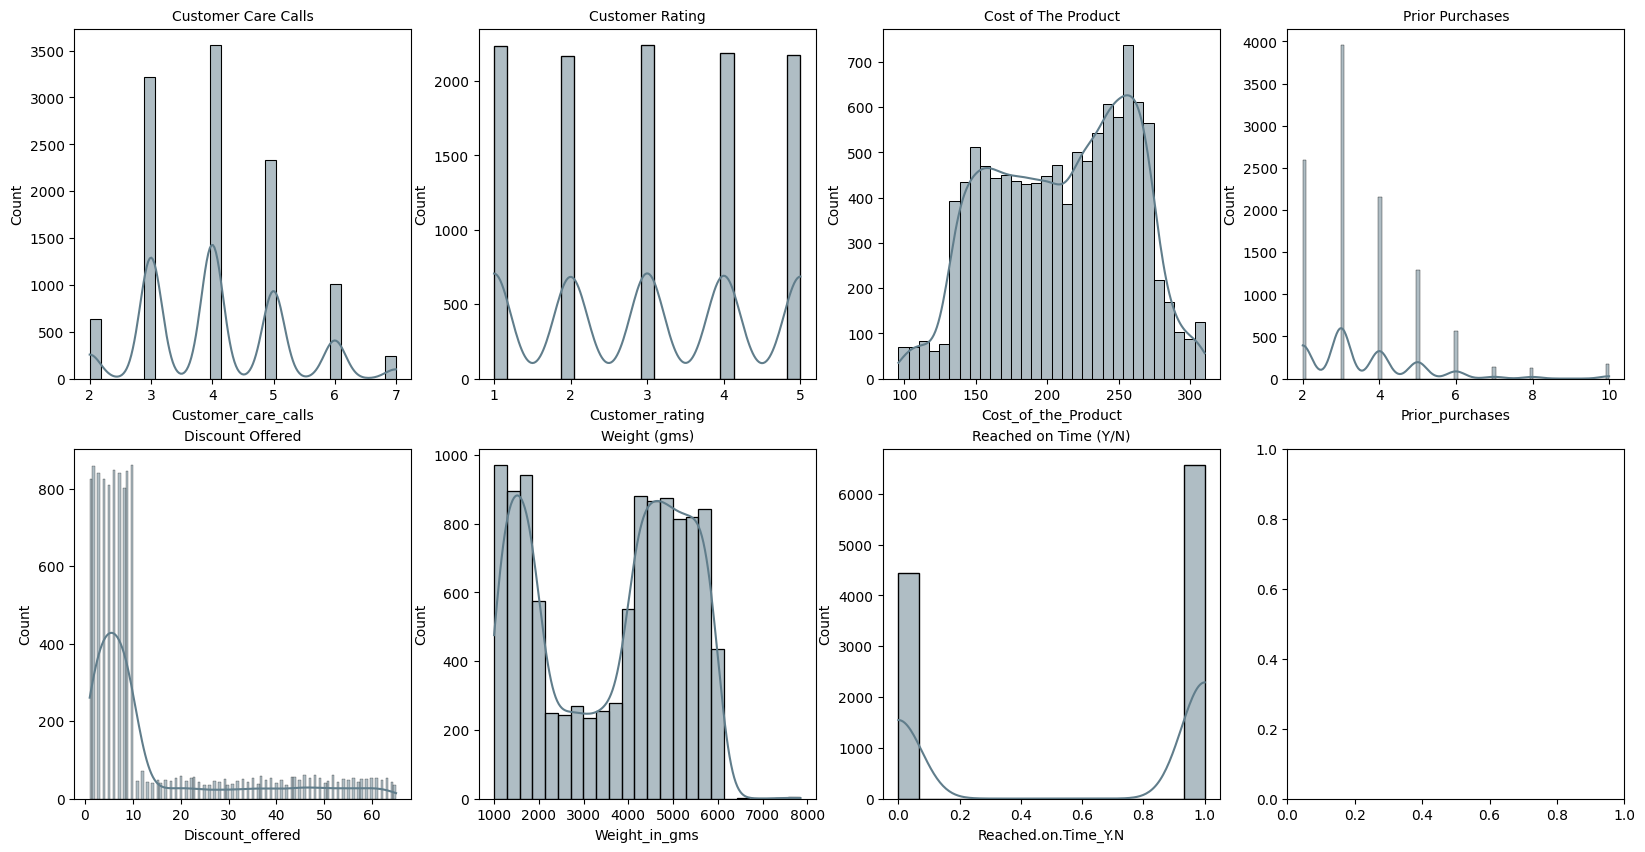

In [16]:
# Data Distribution
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows = 2, ncols = 4, figsize = (20,10))

cols = '#607D8B'

sns.histplot(data=df['Customer_care_calls'], kde=True, color=cols, ax=ax1)
sns.histplot(data=df['Customer_rating'], kde=True, color=cols, ax=ax2)
sns.histplot(data=df['Cost_of_the_Product'], kde=True, color=cols, ax=ax3)
sns.histplot(data=df['Prior_purchases'], kde=True, color=cols, ax=ax4)
sns.histplot(data=df['Discount_offered'], kde=True, color=cols, ax=ax5)
sns.histplot(data=df['Weight_in_gms'], kde=True, color=cols, ax=ax6)
sns.histplot(data=df['Reached.on.Time_Y.N'], kde=True, color=cols, ax=ax7)

ax1.set_title('Customer Care Calls', fontsize=10)
ax2.set_title('Customer Rating', fontsize=10)
ax3.set_title('Cost of The Product', fontsize=10)
ax4.set_title('Prior Purchases', fontsize=10)
ax5.set_title('Discount Offered', fontsize=10)
ax6.set_title('Weight (gms)', fontsize=10)
ax7.set_title('Reached on Time (Y/N)', fontsize=10)

plt.show()

In [17]:
from scipy.stats import normaltest

for column in df.describe().columns:
    stat, pvalue = normaltest(df[column])
    pvalue
    skew = df[column].skew()
    if pvalue > 0.05:
        print(f'{column} \npvalue = {pvalue:.5f}, we assume the data IS normally distributed.')
        if skew > 0.5:
            print(f'skew = {skew:.5f}, the data is right-skewed.\n')
        elif skew < -0.5:
            print(f'skew = {skew:.5f}, the data is left-skewed.\n')
        else:
            print(f'skew = {skew:.5f}, the data is symmetrical.\n')
    else:
        print(f'{column} \npvalue = {pvalue:.5f}, we assume the data is NOT normally distributed.')
        if skew > 0.5:
            print(f'skew = {skew:.5f}, the data is right-skewed.\n')
        elif skew < -0.5:
            print(f'skew = {skew:.5f}, the data is left-skewed.\n')
        else:
            print(f'skew = {skew:.5f}, the data is approximately symmetrical. There is possibility of the data having a uniform distribution.\n')

Customer_care_calls 
pvalue = 0.00000, we assume the data is NOT normally distributed.
skew = 0.39193, the data is approximately symmetrical. There is possibility of the data having a uniform distribution.

Customer_rating 
pvalue = 0.00000, we assume the data is NOT normally distributed.
skew = 0.00436, the data is approximately symmetrical. There is possibility of the data having a uniform distribution.

Cost_of_the_Product 
pvalue = 0.00000, we assume the data is NOT normally distributed.
skew = -0.15712, the data is approximately symmetrical. There is possibility of the data having a uniform distribution.

Prior_purchases 
pvalue = 0.00000, we assume the data is NOT normally distributed.
skew = 1.68190, the data is right-skewed.

Discount_offered 
pvalue = 0.00000, we assume the data is NOT normally distributed.
skew = 1.79893, the data is right-skewed.

Weight_in_gms 
pvalue = 0.00000, we assume the data is NOT normally distributed.
skew = -0.24975, the data is approximately symme

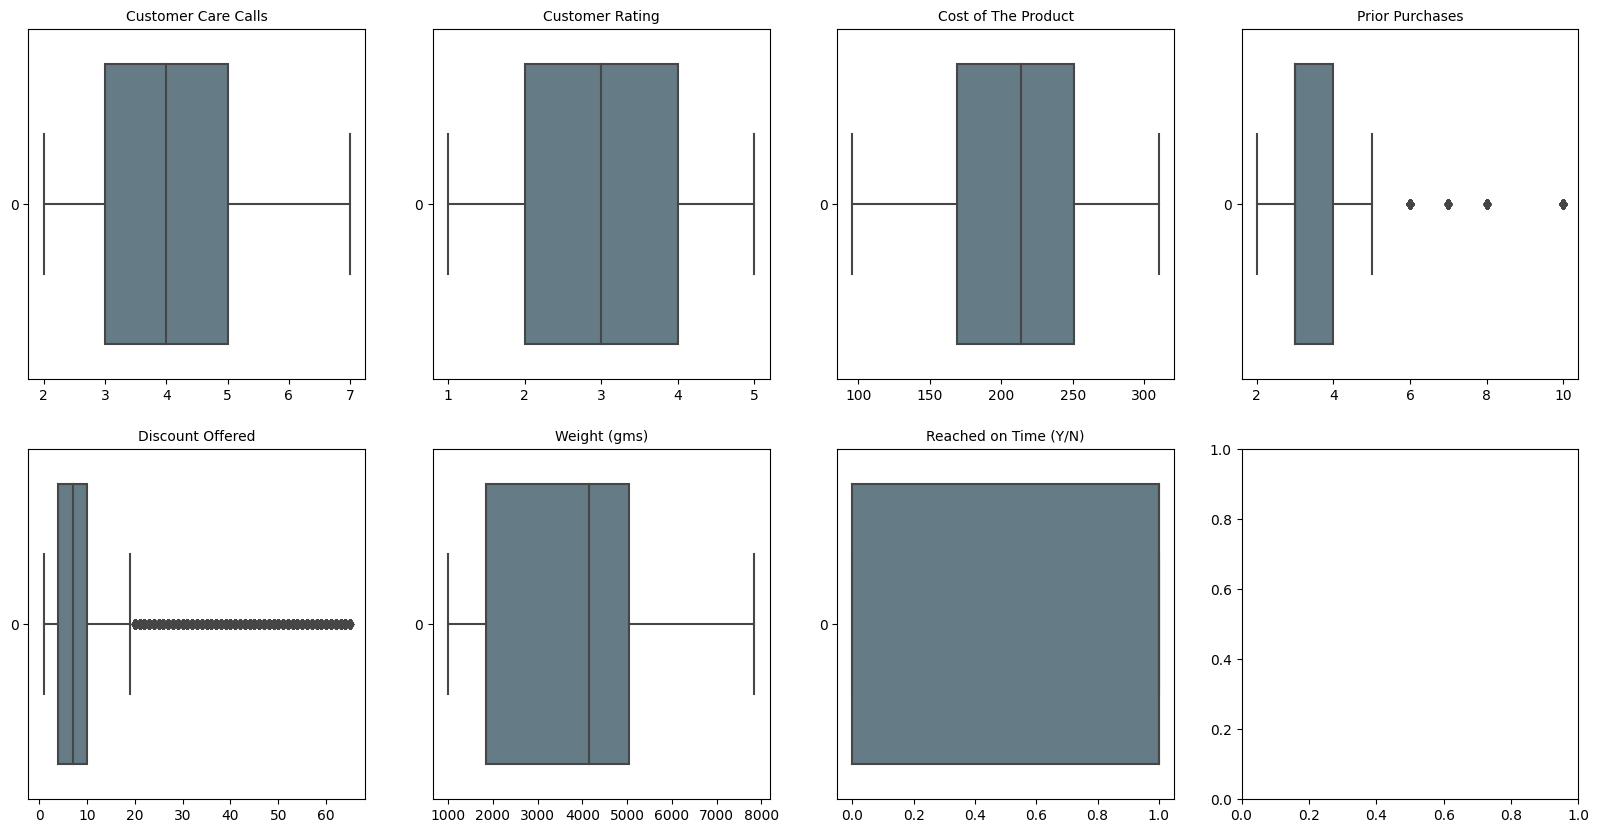

In [18]:
# Detect Outlier
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows = 2, ncols = 4, figsize = (20,10))

cols = '#607D8B'

sns.boxplot(data=df['Customer_care_calls'], orient="h", color=cols, ax=ax1)
sns.boxplot(data=df['Customer_rating'], orient="h", color=cols, ax=ax2)
sns.boxplot(data=df['Cost_of_the_Product'], orient="h", color=cols, ax=ax3)
sns.boxplot(data=df['Prior_purchases'], orient="h", color=cols, ax=ax4)
sns.boxplot(data=df['Discount_offered'], orient="h", color=cols, ax=ax5)
sns.boxplot(data=df['Weight_in_gms'], orient="h", color=cols, ax=ax6)
sns.boxplot(data=df['Reached.on.Time_Y.N'], orient="h", color=cols, ax=ax7)

ax1.set_title('Customer Care Calls', fontsize=10)
ax2.set_title('Customer Rating', fontsize=10)
ax3.set_title('Cost of The Product', fontsize=10)
ax4.set_title('Prior Purchases', fontsize=10)
ax5.set_title('Discount Offered', fontsize=10)
ax6.set_title('Weight (gms)', fontsize=10)
ax7.set_title('Reached on Time (Y/N)', fontsize=10)

plt.show()

**Penjelasan**
- Tidak ada kolom yang berdistribusi normal saat diuji dengan uji normalitas.
- Kolom `Prior_purchases`, dan `Discount_offered` tidak terdistribusi dengan baik dan miring ke kanan. Hal ini menunjukkan rata-rata lebih besar dari median.
- Kolom `Customer_care_calls`, `Customer_rating`, `Cost_of_the_Product`, `Weight_in_gms`, dan `Reached.on.Time_Y.N` tidak terdistribusi dengan baik tetapi memiliki kemiringan antara -0,5 dan 0,5. Menurut [<font color='#B85048'><u>artikel ini</u></font>](https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241) jika skewness antara -0,5 dan 0,5, distribusinya kira-kira simetris. Dengan demikian, kita dapat mengatakan bahwa kolom tersebut memiliki distribusi uniform.
- Outlier ditemukan di kolom `Prior_purchases` dan `Discount_offered`. Mari kita selidiki lebih lanjut.


### **Menangani Outlier**

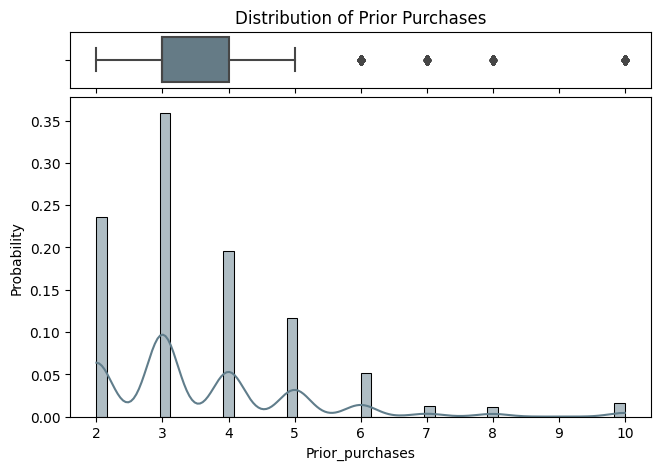

In [19]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(7.5,5), gridspec_kw={'height_ratios':(.15, .85),'hspace':0.05})

ax1.set_title('Distribution of Prior Purchases')
sns.boxplot(x=df['Prior_purchases'], ax=ax1, color='#607D8B')
ax1.set(xlabel='')

sns.histplot(data=df['Prior_purchases'], ax=ax2, stat='probability', kde=True, bins=50, color='#607D8B')
plt.show()

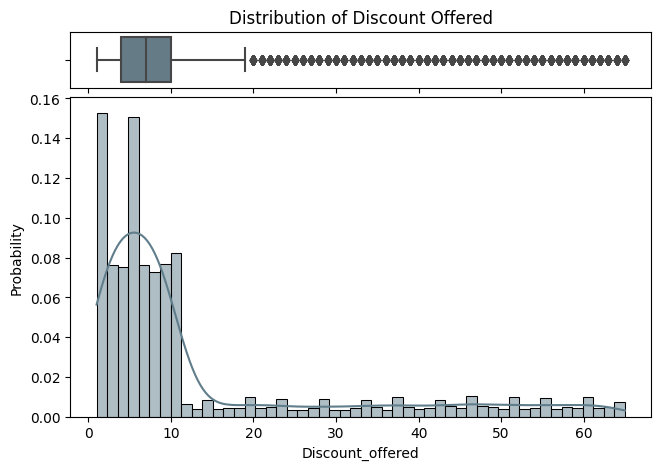

In [20]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(7.5,5), gridspec_kw={'height_ratios':(.15, .85),'hspace':0.05})

ax1.set_title('Distribution of Discount Offered')
sns.boxplot(x=df['Discount_offered'], ax=ax1, color='#607D8B')
ax1.set(xlabel='')

sns.histplot(data=df['Discount_offered'], ax=ax2, stat='probability', kde=True, bins=50, color='#607D8B')
plt.show()

**Penjelasan**
- Kita tidak perlu menghilangkan pencilan dari kolom `Prior_purchases` dan `Discount_offered.`
- Kami masih membutuhkan data kolom `Prior_purchases` untuk mempelajari perilaku pembelian pelanggan.
- Data kolom `Discount_offered` masih diperlukan untuk mendalami diskon yang diberikan perusahaan kepada pelanggan.

### **Pengelompokan Data**

Pengelompokan data dilakukan untuk mempermudah analisis kedepannya.

In [21]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,E,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [22]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [23]:
# membagi cost of product ke 3 kelas (cheap, normal, expensive) berdasarkan min - 25%, 25% - 75%, 75% - max
df['Cost_class'] = ['cheap' if (x <= 169) else 'expensive' if (x >= 251) else 'normal' for x in df['Cost_of_the_Product'].values]

In [24]:
# membagi diskon menjadi 5 kelas, 65/5 = 13 interval diskon
df['Discount_class'] = ['1-13(%)' if (x<=13) else '14-26(%)' if ((x>13) & (x<27)) else '27-39(%)' if ((x>26) & (x<40)) else '40-52(%)' if ((x>39) & (x<53)) else '53-65(%)' for x in df['Discount_offered'].values]

In [25]:
# membagi berat produk menjadi 3 kelas (light, medium, heavy) berdasarkan min - 25%, 25% - 75%, 75% - max
df['Weight_class'] = ['light' if (x <= 1839.5) else 'heavy' if (x >= 5050) else 'medium' for x in df['Weight_in_gms'].values]

In [26]:
# membagi rating menjadi 2 kelas, rendah jika kurang sama dengan 3, tinggi jika lebih dari 3
df['Rating_class'] = ['low rating' if (x <= 3) else 'high rating' for x in df['Customer_rating'].values]

In [27]:
# membagi telefon pelanggan menjadi 3 kelas (few, moderate, frequent) berdasarkan 2-3, 4-5, 6-7
df['Call_intensity'] = ['few' if (x<=3) else 'moderate' if ((x>3)&(x<6)) else 'frequent' for x in df['Customer_care_calls'].values]

In [28]:
# simpan ke dalam csv untuk di analisi di TABLEAU
df.to_csv('Online Retail Shipping Clean.csv')

****
# **Data Analisis**
****

### **Eksplorasi Kolom Kategorikal**

Disini kita akan melihat persebaran produk berdasarkan kolom kategorikal.

In [29]:
df.describe(include=object)

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Cost_class,Discount_class,Weight_class,Rating_class,Call_intensity
count,10999,10999,10999,10999,10999,10999,10999,10999,10999
unique,5,3,3,2,3,5,3,2,3
top,E,Ship,low,F,normal,1-13(%),medium,low rating,moderate
freq,3666,7462,5297,5545,5470,8514,5498,6639,5885


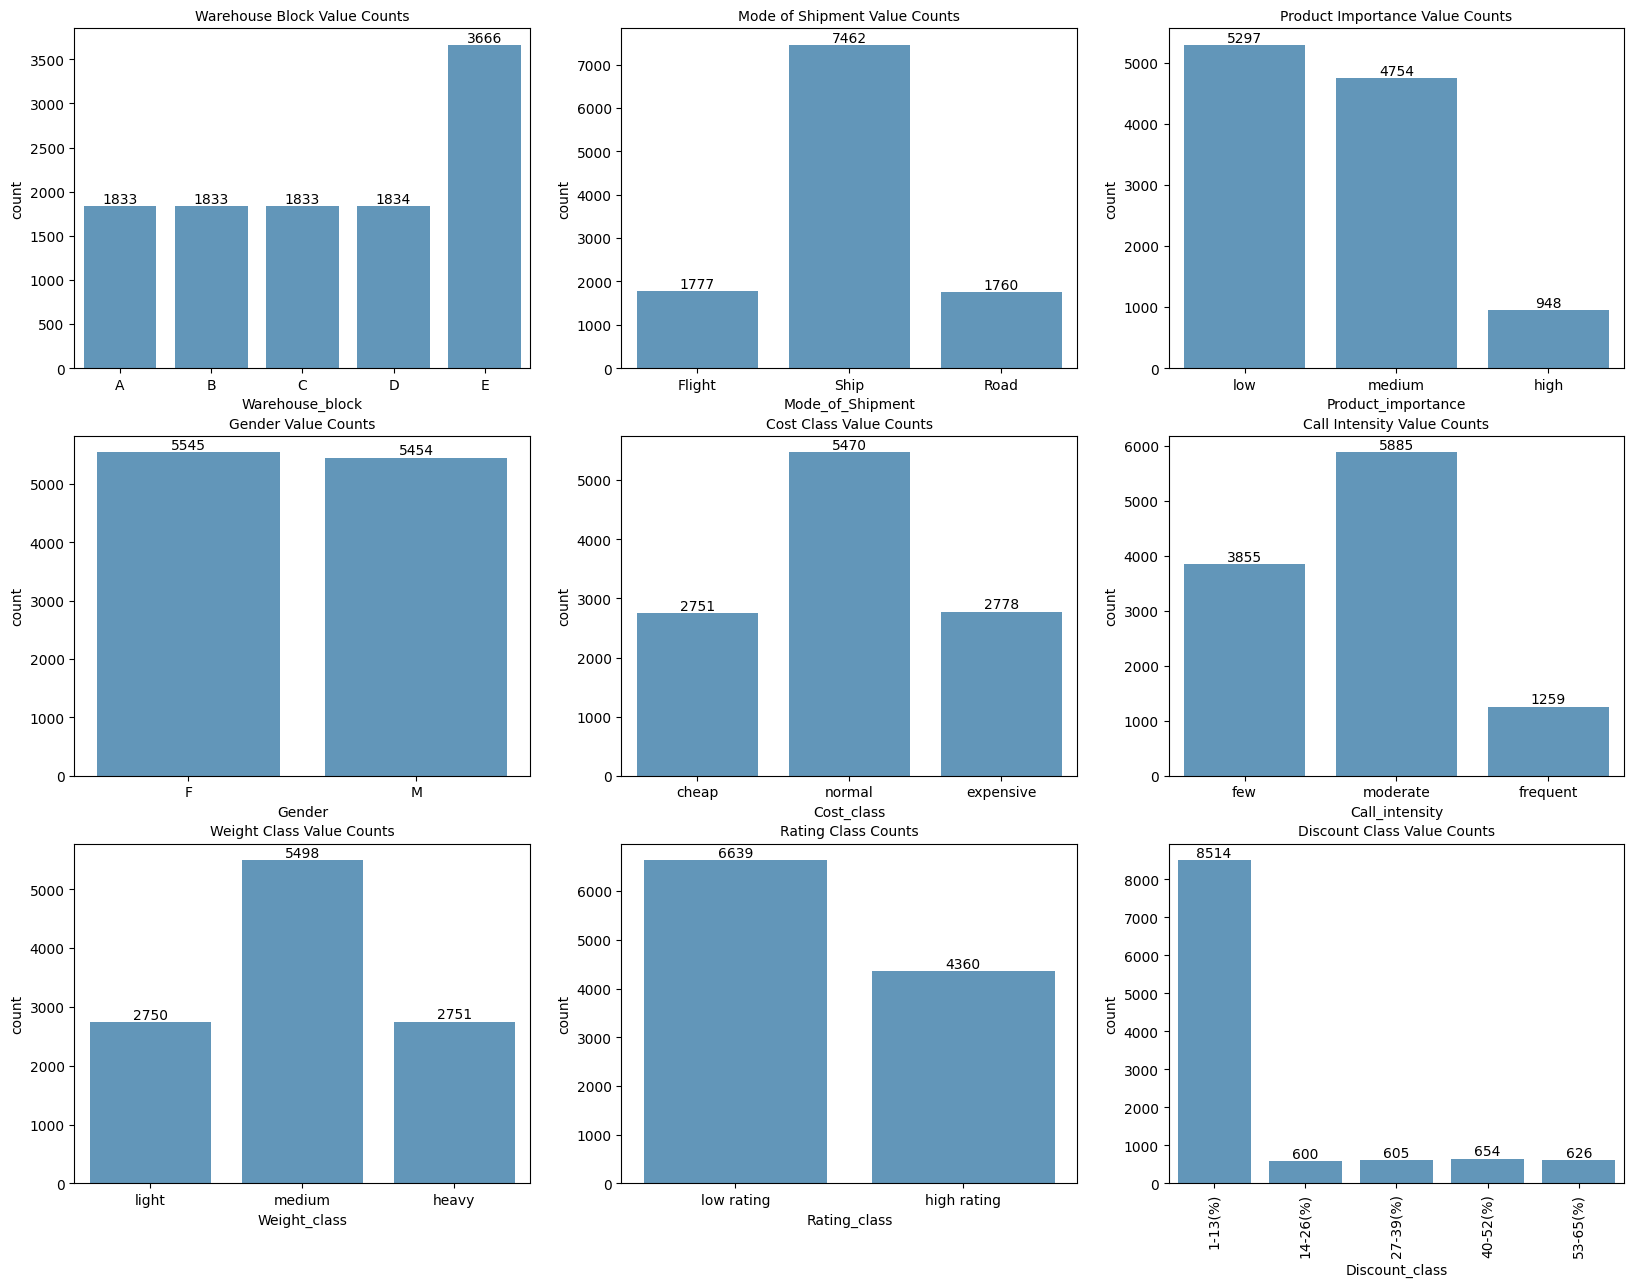

In [30]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(nrows = 3, ncols = 3, figsize = (20,15))

cols = '#5499C7'

sns.countplot(x=df['Warehouse_block'], color=cols, ax=ax1, order=['A','B','C','D','E'])
sns.countplot(x=df['Mode_of_Shipment'], color=cols, ax=ax2)
sns.countplot(x=df['Product_importance'], color=cols, ax=ax3)
sns.countplot(x=df['Gender'], color=cols, ax=ax4)
sns.countplot(x=df['Cost_class'], color=cols, ax=ax5, order=['cheap', 'normal', 'expensive'])
sns.countplot(x=df['Call_intensity'], color=cols, ax=ax6, order=['few', 'moderate', 'frequent'])
sns.countplot(x=df['Weight_class'], color=cols, ax=ax7)
sns.countplot(x=df['Rating_class'], color=cols, ax=ax8)
sns.countplot(x=df['Discount_class'], color=cols, ax=ax9, order=['1-13(%)','14-26(%)','27-39(%)','40-52(%)','53-65(%)'])

ax1.set_title('Warehouse Block Value Counts', fontsize=10)
ax2.set_title('Mode of Shipment Value Counts', fontsize=10)
ax3.set_title('Product Importance Value Counts', fontsize=10)
ax4.set_title('Gender Value Counts', fontsize=10)
ax5.set_title('Cost Class Value Counts', fontsize=10)
ax6.set_title('Call Intensity Value Counts', fontsize=10)
ax7.set_title('Weight Class Value Counts', fontsize=10)
ax8.set_title('Rating Class Counts', fontsize=10)
ax9.set_title('Discount Class Value Counts', fontsize=10)

ax1.bar_label(ax1.containers[0], label_type='edge')
ax2.bar_label(ax2.containers[0], label_type='edge')
ax3.bar_label(ax3.containers[0], label_type='edge')
ax4.bar_label(ax4.containers[0], label_type='edge')
ax5.bar_label(ax5.containers[0], label_type='edge')
ax6.bar_label(ax6.containers[0], label_type='edge')
ax7.bar_label(ax7.containers[0], label_type='edge')
ax8.bar_label(ax8.containers[0], label_type='edge')
ax9.bar_label(ax9.containers[0], label_type='edge')

plt.xticks(rotation = 90)

plt.show()

**INSIGHT 1**
****
- Adanya penumpukan produk pada Gudang F sebesar 2x dari gudang lainnya.
- Kita bisa asumsikan bahwa Gudang A,B,C,D memiliki jumlah produk yang sama.
- Mode pengiriman yang paling dipilih oleh perusahaan adalah kapal.
- Jenis kelamin wanita lebih mendominasi sedikit dibanding laki-laki dalam berbelanja produk di perusahaan ini.
- Produk yang mendominasi adalah produk dengan berat medium, kepentingan/urgensi rendah, serta harga normal.
- Intensitas panggilan pelanggan kepada perusahaan paling banyak adalah moderat.
- Rating yang diberikan pelanggan mayoritas adalah rendah atau dibawah dan sama dengan 3.
- Banyak produk yang diskonnya dibawah 13%.

### **Analisis Waktu Pengiriman**

Disinilah kita akan melakukan analisis data pelanggan yang produknya sampai tepat waktu (`Reached.on.Time_Y.N `= 0) dan terlambat (`Reached.on.Time_Y.N `= 1) berdasarkan fitur yang tersedia.

In [31]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_class,Discount_class,Weight_class,Rating_class,Call_intensity
0,D,Flight,4,2,177,3,low,F,44,1233,1,normal,40-52(%),light,low rating,moderate
1,E,Flight,4,5,216,2,low,M,59,3088,1,normal,53-65(%),medium,high rating,moderate
2,A,Flight,2,2,183,4,low,M,48,3374,1,normal,40-52(%),medium,low rating,few
3,B,Flight,3,3,176,4,medium,M,10,1177,1,normal,1-13(%),light,low rating,few
4,C,Flight,2,2,184,3,medium,F,46,2484,1,normal,40-52(%),medium,low rating,few


Mari kita lihat perbandingan *Reached Time* antara *On Time* dan *Delayed* secara keseluruhan.

In [32]:
df.groupby('Reached.on.Time_Y.N')['Mode_of_Shipment'].count().values

array([4436, 6563])

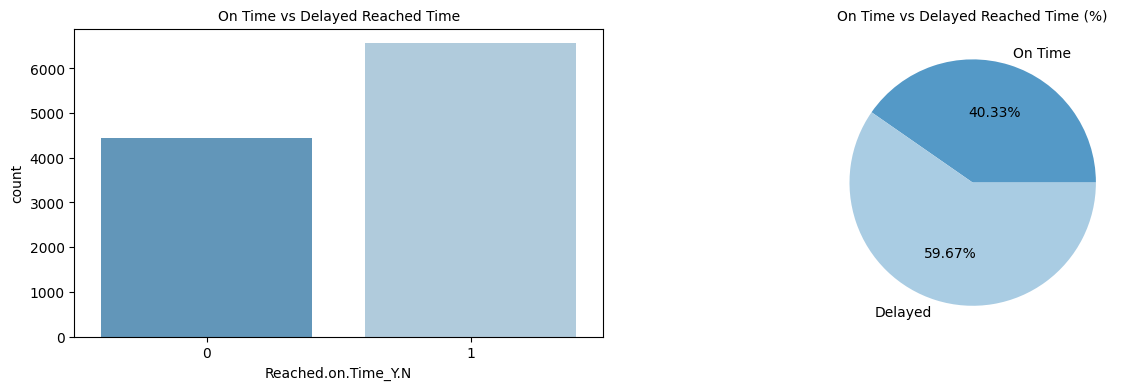

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4))

sns.countplot(data=df, x='Reached.on.Time_Y.N', palette=['#5499C7','#A9CCE3'], ax=ax1)
ax2.pie(df.groupby('Reached.on.Time_Y.N')['Mode_of_Shipment'].count().values, labels = ['On Time', 'Delayed'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')

ax1.set_title('On Time vs Delayed Reached Time', fontsize=10)
ax2.set_title('On Time vs Delayed Reached Time (%)', fontsize=10)

plt.show()

Mari kita lihat perbandingan *Reached Time* antara *On Time* dan *Delayed* berdasarkan faktor pengiriman (warehouse, mode of shipement).

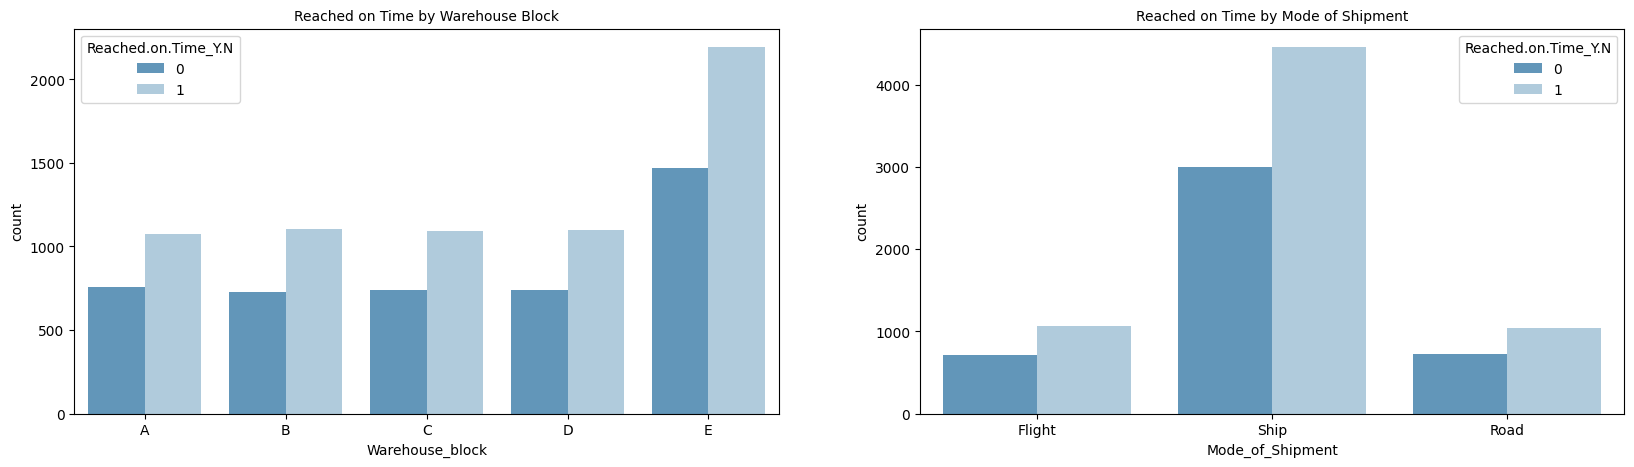

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

cols = ['#5499C7','#A9CCE3']

sns.countplot(data=df, x='Warehouse_block', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax1, order=['A','B','C','D','E'])
sns.countplot(data=df, x='Mode_of_Shipment', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax2)

ax1.set_title('Reached on Time by Warehouse Block', fontsize=10)
ax2.set_title('Reached on Time by Mode of Shipment', fontsize=10)

plt.show()

Mari kita lihat perbandingan *Reached Time* antara *On Time* dan *Delayed* berdasarkan faktor produk (cost class, product importance, discount class, weight class).

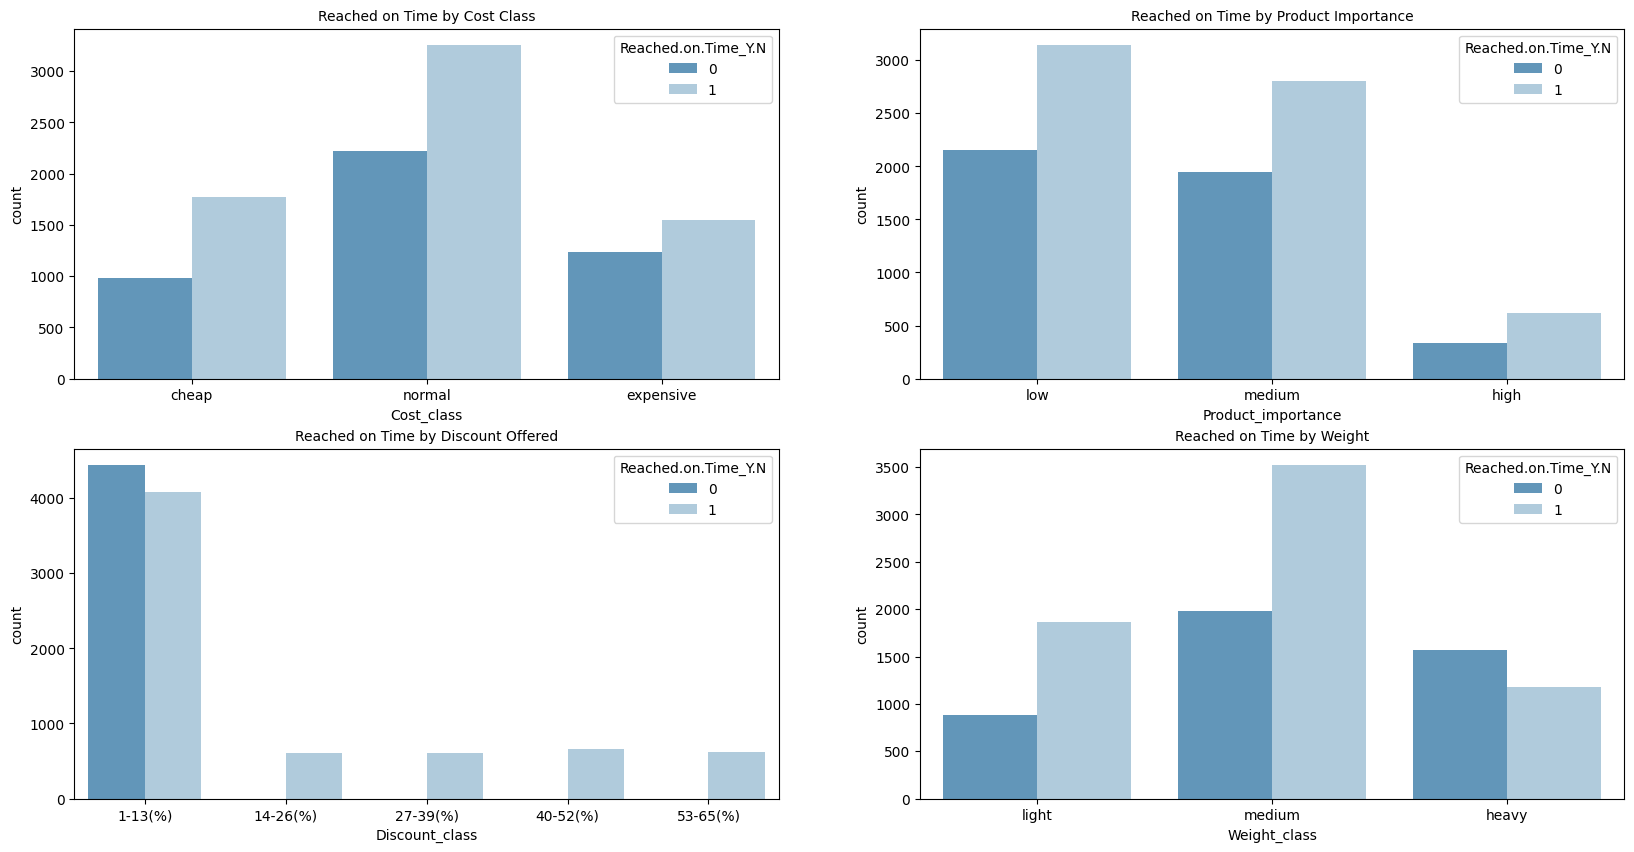

In [35]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))

cols = ['#5499C7','#A9CCE3']

sns.countplot(data=df, x='Cost_class', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax1, order=['cheap', 'normal', 'expensive'])
sns.countplot(data=df, x='Product_importance', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax2)
sns.countplot(data=df, x='Discount_class', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax3, order=['1-13(%)','14-26(%)','27-39(%)','40-52(%)','53-65(%)'])
sns.countplot(data=df, x='Weight_class', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax4)

ax1.set_title('Reached on Time by Cost Class', fontsize=10)
ax2.set_title('Reached on Time by Product Importance', fontsize=10)
ax3.set_title('Reached on Time by Discount Offered', fontsize=10)
ax4.set_title('Reached on Time by Weight', fontsize=10)

plt.show()

Mari kita lihat perbandingan *Reached Time* antara *On Time* dan *Delayed* berdasarkan faktor pelanggan (call intensity, customer rating, prior purchases, gender).

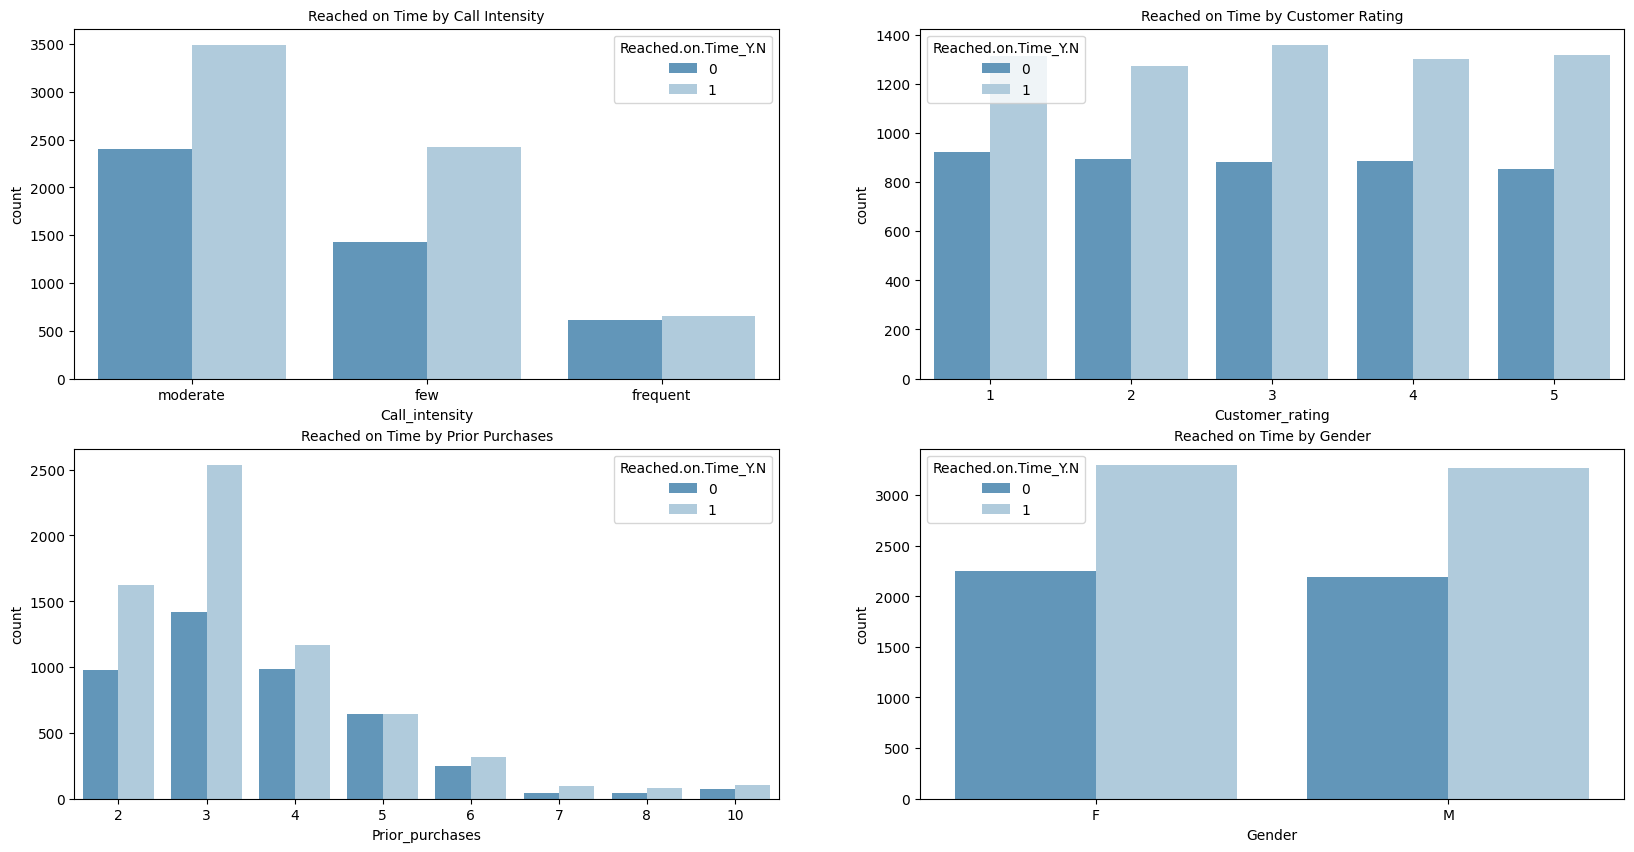

In [36]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))

cols = ['#5499C7','#A9CCE3']

sns.countplot(data=df, x='Call_intensity', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax1)
sns.countplot(data=df, x='Customer_rating', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax2)
sns.countplot(data=df, x='Prior_purchases', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax3)
sns.countplot(data=df, x='Gender', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax4)

ax1.set_title('Reached on Time by Call Intensity', fontsize=10)
ax2.set_title('Reached on Time by Customer Rating', fontsize=10)
ax3.set_title('Reached on Time by Prior Purchases', fontsize=10)
ax4.set_title('Reached on Time by Gender', fontsize=10)

plt.show()

*Prior purchases* = 5 terlihat memiliki *value counts reached time* yang sama antara 0 dan 1. Mari kita lihat lebih detail.

In [37]:
df[df['Prior_purchases'] == 5]['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
0    645
1    642
Name: count, dtype: int64

**INSIGHT 2**
****
- Secara keseluruhan, 59.67 produk pengirimannya tertunda dan hanya 40.33% yang sampai tepat waktu.
- Dilihat dari faktor pengiriman, produk yang pengirimannya tertunda lebih banyak dibandingkan dengan yang sampai tepat waktu.
- Dilihat dari faktor produk, produk dengan diskon dibawah 13% dan beban berat lebih banyak yang sampai tepat waktu dibandingkan yang tertunda.
- Diskon diatas 13% sudah dipastikan pengiriman mengalami penundaan.
- Dilihat dari faktor pelanggan, produk yang pengirimannya tertunda lebih banyak dibandingkan dengan yang sampai tepat waktu.
- Pelanggan dengan prior purchase = 5 memiliki 3 produk dengan jumlah pengiriman tepat waktu lebih banyak dibandingkan yang tertunda.

Mari kita lihat korelasi antara kolom numerik. Apa saja fitur yang berkaitan dengan *Reached Time*?

In [38]:
df_corr = df.corr(numeric_only=True, method='spearman')[['Reached.on.Time_Y.N']].sort_values(by='Reached.on.Time_Y.N')
df_corr

,Reached.on.Time_Y.N
Weight_in_gms,-0.265958
Prior_purchases,-0.074643
Cost_of_the_Product,-0.071850
Customer_care_calls,-0.064283
Customer_rating,0.013108
Discount_offered,0.335108
Reached.on.Time_Y.N,1.000000


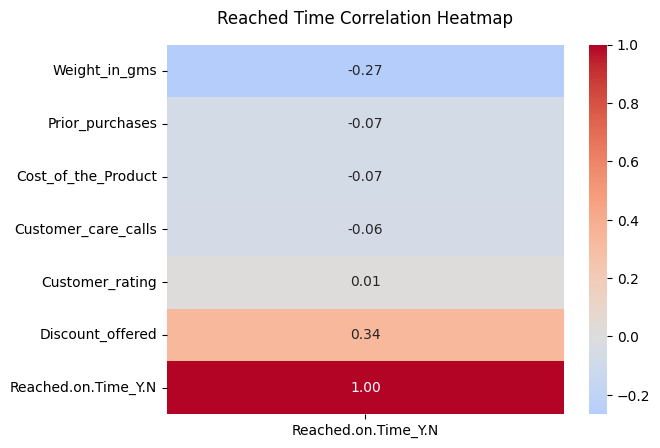

In [39]:
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Reached Time Correlation Heatmap', pad=15)
plt.show()

Mari kita lihat alasan mengapa produk dengan beban berat bisa lebih banyak produk yang sampai tepat waktu dibandingkan terlambat.

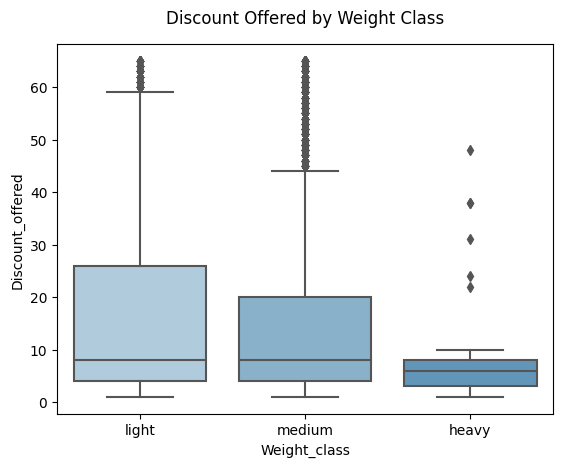

In [40]:
sns.boxplot(data=df, x='Weight_class', y='Discount_offered', palette=['#A9CCE3','#7FB3D5','#5499C7'])
plt.title('Discount Offered by Weight Class', pad=15)
plt.show()

**INSIGHT 3**
****
- Fitur yang mempunyai korelasi positif paling kuat dengan *reached time* adalah *discount offered*. Semakin tinggi diskon yang diberikan, semakin tinggi reached time = 1 (terlambat).
- Fitur yang mempunyai korelasi negatif paling kuat dengan *reached time* adalah *weight*. Semakin berat sebuah produk, semakin rendah reached time = 0 (tepat waktu).
- Fitur lainnya memiliki nilai mendekati 0 atau tidak terlalu berpengaruh.
- Produk dengan beban berat kebanyakan diberikan diskon dibawah 10%. Sedangkan produk dengan beban ringan dan sedang diberikan diskon yang lebih besar.

### **Analisis Kepentingan/Urgensi Produk**

Sekarang kita ingin melihat analisis dari sisi *product importance*. Seharusnya semakin tinggi kepentingan suatu produk, perusahaan semakin memastikan barangnya sampai dengan tepat waktu dan memberikan kepuasan pengiriman terhadap pelanggan.

In [41]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_class,Discount_class,Weight_class,Rating_class,Call_intensity
0,D,Flight,4,2,177,3,low,F,44,1233,1,normal,40-52(%),light,low rating,moderate
1,E,Flight,4,5,216,2,low,M,59,3088,1,normal,53-65(%),medium,high rating,moderate
2,A,Flight,2,2,183,4,low,M,48,3374,1,normal,40-52(%),medium,low rating,few
3,B,Flight,3,3,176,4,medium,M,10,1177,1,normal,1-13(%),light,low rating,few
4,C,Flight,2,2,184,3,medium,F,46,2484,1,normal,40-52(%),medium,low rating,few


Mari kita lihat perbandingan presentase *Reached Time* antara *On Time* dan *Delayed* berdasarkan kepentingan produk.

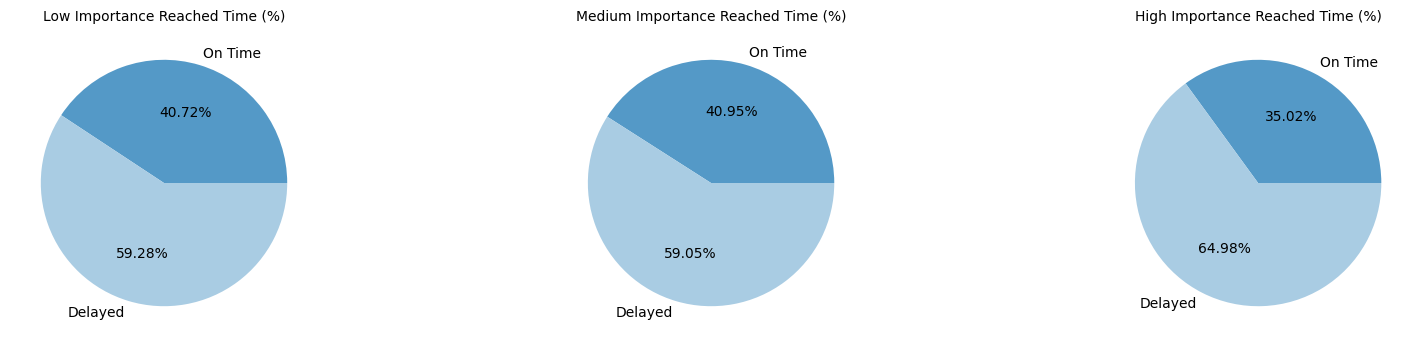

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,4))

ax1.pie(df[df['Product_importance'] == 'low'].groupby('Reached.on.Time_Y.N')['Mode_of_Shipment'].count().values, labels = ['On Time', 'Delayed'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')
ax2.pie(df[df['Product_importance'] == 'medium'].groupby('Reached.on.Time_Y.N')['Mode_of_Shipment'].count().values, labels = ['On Time', 'Delayed'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')
ax3.pie(df[df['Product_importance'] == 'high'].groupby('Reached.on.Time_Y.N')['Mode_of_Shipment'].count().values, labels = ['On Time', 'Delayed'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')

ax1.set_title('Low Importance Reached Time (%)', fontsize=10)
ax2.set_title('Medium Importance Reached Time (%)', fontsize=10)
ax3.set_title('High Importance Reached Time (%)', fontsize=10)

plt.show()

Mari kita lihat pembagian *product importance* berdasarkan faktor pengiriman (warehouse, mode of shipement).

In [43]:
wb_pi = df.groupby(['Warehouse_block','Product_importance'])[['Mode_of_Shipment']].count().reset_index().rename(columns={'Mode_of_Shipment':'count'})
wb_pi.head()

,Warehouse_block,Product_importance,count
0,A,high,165
1,A,low,909
2,A,medium,759
3,B,high,146
4,B,low,855


In [44]:
ms_pi = df.groupby(['Mode_of_Shipment','Product_importance'])[['Warehouse_block']].count().reset_index().rename(columns={'Warehouse_block':'count'})
ms_pi.head()

,Mode_of_Shipment,Product_importance,count
0,Flight,high,163
1,Flight,low,838
2,Flight,medium,776
3,Road,high,158
4,Road,low,857


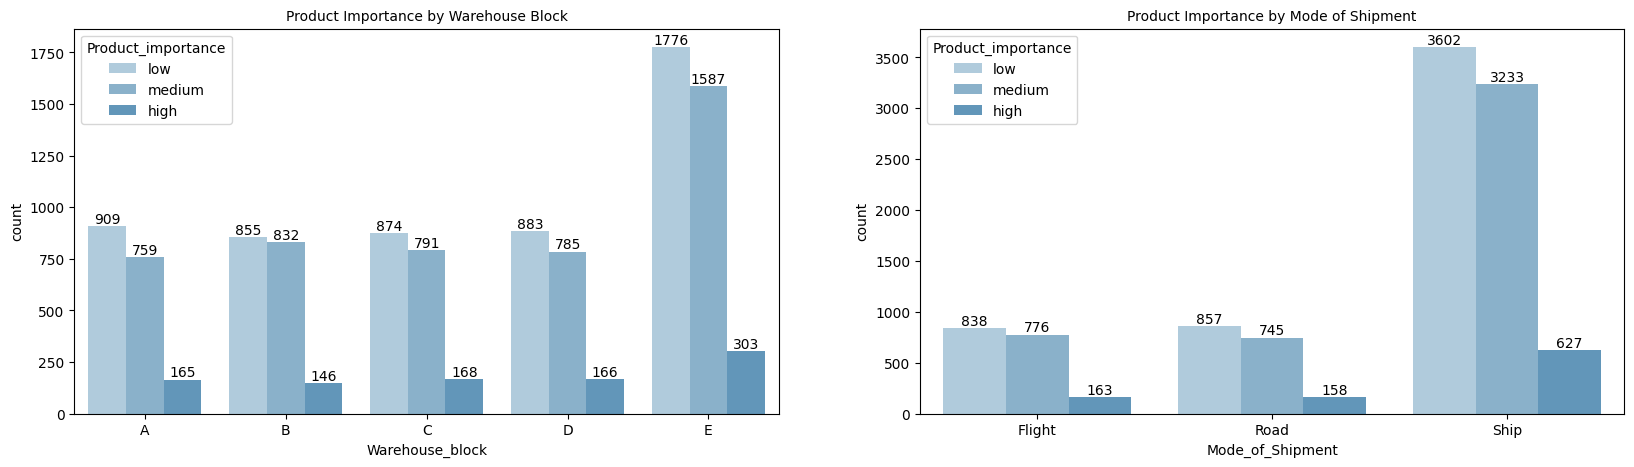

In [45]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.barplot(data=wb_pi, x='Warehouse_block', y='count', hue='Product_importance', palette=['#A9CCE3','#7FB3D5','#5499C7'], hue_order=['low','medium','high'], ax=ax1)
sns.barplot(data=ms_pi, x='Mode_of_Shipment', y='count', hue='Product_importance', palette=['#A9CCE3','#7FB3D5','#5499C7'], hue_order=['low','medium','high'], ax=ax2)

ax1.set_title('Product Importance by Warehouse Block', fontsize=10)
ax2.set_title('Product Importance by Mode of Shipment', fontsize=10)

for container in ax1.containers:
    ax1.bar_label(container)

for container in ax2.containers:
    ax2.bar_label(container)

plt.show()

**INSIGHT 4**
****
- Produk dengan kepentingan tinggi (*high importance*) justru yang paling banyak mengalami keterlambatan dibandingkan yang lain.
- Kebanyakan produk masih menumpuk di gudang E.
- Kebanyakan produk masih dikirim dengan mode pengiriman kapal.
- Untuk produk dengan kepentingan tinggi dan sedang, perusahaan lebih memilih mode penerbangan/udara dibandingkan dengan mobil/darat.
- Untuk produk dengan kepentingan rendah, perusahaan lebih memilih mode mobil/darat dibandingkan penerbangan/udara.

Mari kita cari tahu bagaimana perusahaan mengkategorikan barang sesuai dengan kepentingannya. Pertama kita lihat apakah kepentingan produk dilihat dari seberapa mahal produk tersebut.

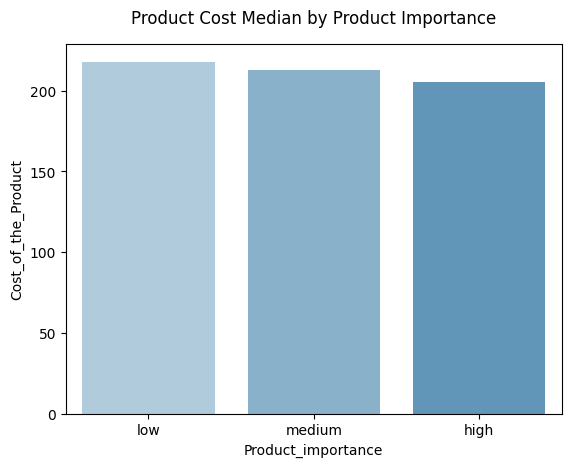

In [46]:
sns.barplot(data=df, x='Product_importance', y='Cost_of_the_Product', estimator=np.median, errorbar=('ci', 0), palette=['#A9CCE3','#7FB3D5','#5499C7'])
plt.title('Product Cost Median by Product Importance', pad=15)
plt.show()

Ternyata kepentingan produk tidak berdasarkan seberapa mahalnya produk. Mari kita lihat apakah berdasarkan berat produk.

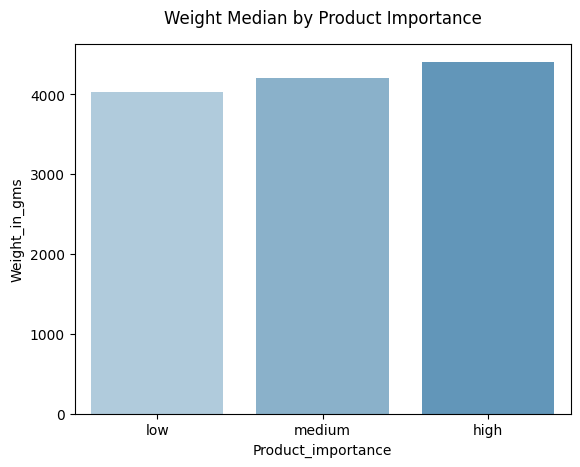

In [47]:
sns.barplot(data=df, x='Product_importance', y='Weight_in_gms', estimator=np.median, errorbar=('ci', 0), palette=['#A9CCE3','#7FB3D5','#5499C7'])
plt.title('Weight Median by Product Importance', pad=15)
plt.show()

Kalau dari barchart diatas memang median beban yang paling berat ada di *high importance*, dalam artian semakin berat produk semakin tinggi kepentingan produk. Mari kita buktikan dengan melihat persebaran diskon. Seharusnya produk dengan *high importance* memiliki diskon yang rendah.

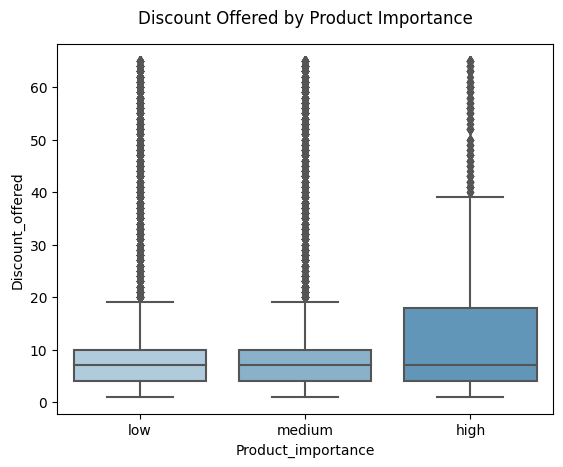

In [48]:
sns.boxplot(data=df, x='Product_importance', y='Discount_offered', palette=['#A9CCE3','#7FB3D5','#5499C7'])
plt.title('Discount Offered by Product Importance', pad=15)
plt.show()

Justru produk *high importance* yang paling banyak dapet diskon, makanya lebih banyak yang tidak sampai tepat waktu/tertunda. Jika kita asumsikan *product importance* itu dari berat barangnya, ini tidak masuk akal. Karena justru barang berat lebih banyak yg *On Time*. Mari kita lihat korelasi untuk mendukung asumsi ini.

In [49]:
# tambahkan kolom product importance versi ordinal (1 rendah, 2 medium, 3 tinggi)
df['Product_importance_num'] =  [1 if x == 'low' else 2 if x == 'medium' else 3 for x in df['Product_importance'].values]

In [50]:
df_corr = df.corr(numeric_only=True, method='spearman')[['Product_importance_num']].sort_values(by='Product_importance_num')
df_corr

,Product_importance_num
Customer_care_calls,-0.052884
Cost_of_the_Product,-0.043801
Prior_purchases,-0.019877
Customer_rating,0.004373
Discount_offered,0.012681
Reached.on.Time_Y.N,0.016075
Weight_in_gms,0.081472
Product_importance_num,1.000000


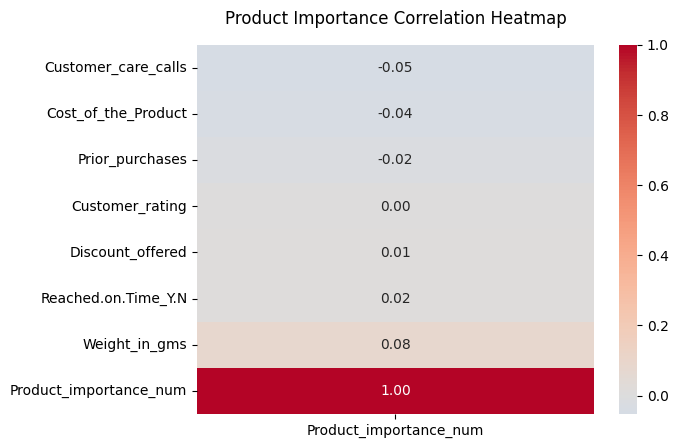

In [51]:
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Product Importance Correlation Heatmap', pad=15)
plt.show()

**INSIGHT 5**
****
- Kepentingan produk bukan diukur dari *monetary value*. Karena justru barang dengan kepentingan rendah punya median harga paling mahal, sedangkan yang kepentingannya tinggi punya median harga paling murah.
- Dari korelasi *product importance* kita bisa lihat bahwa korelasinya sangat rendah hampir tidak ada sama sekali korelasi antara *product importance* dan fitur lain.
- Jadi, kita tidak punya cukup bukti untuk mengatakan bahwa *product importance* itu ditentukan dari beratnya suatu barang.


Mari kita lihat *rating* yang diberikan pelanggan berdasarkan *product importance*

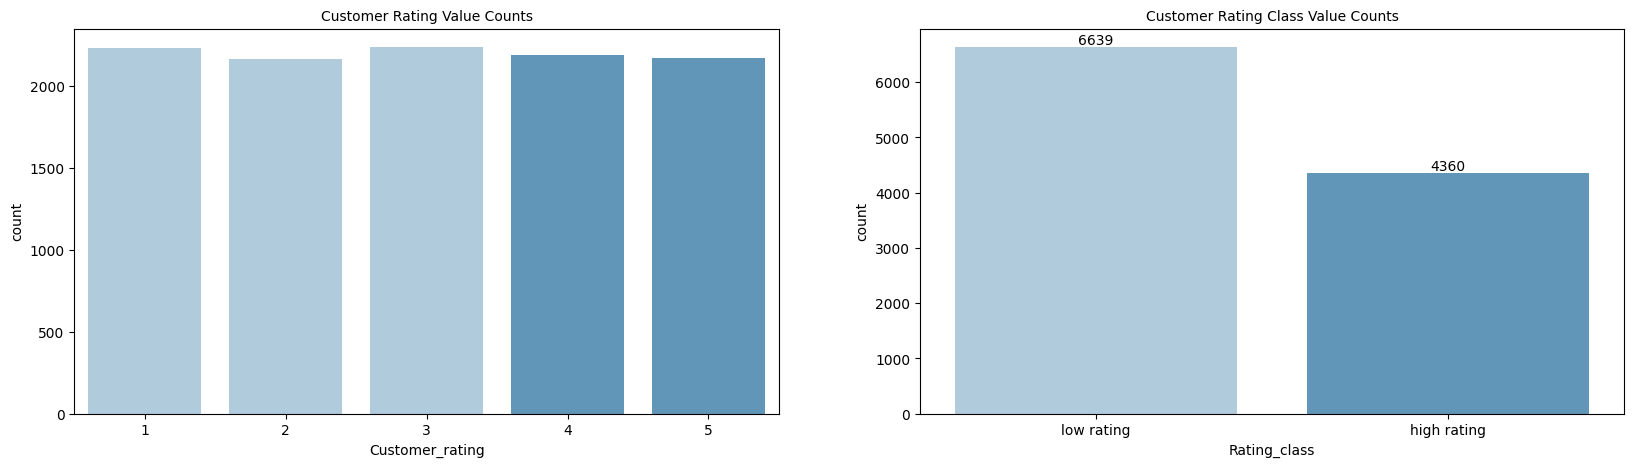

In [52]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.countplot(x=df['Customer_rating'], palette=['#A9CCE3','#A9CCE3','#A9CCE3','#5499C7','#5499C7'], ax=ax1)
sns.countplot(x=df['Rating_class'], palette=['#A9CCE3','#5499C7'], ax=ax2)

ax1.set_title('Customer Rating Value Counts', fontsize=10)
ax2.set_title('Customer Rating Class Value Counts', fontsize=10)

ax2.bar_label(ax2.containers[0], label_type='edge')

plt.show()

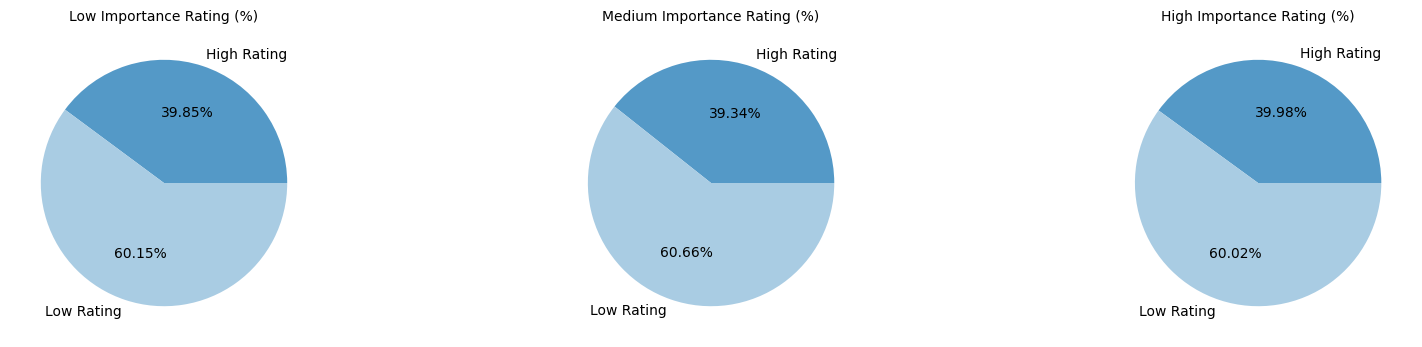

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,4))

ax1.pie(df[df['Product_importance'] == 'low'].groupby('Rating_class')['Mode_of_Shipment'].count().values, labels = ['High Rating', 'Low Rating'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')
ax2.pie(df[df['Product_importance'] == 'medium'].groupby('Rating_class')['Mode_of_Shipment'].count().values, labels = ['High Rating', 'Low Rating'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')
ax3.pie(df[df['Product_importance'] == 'high'].groupby('Rating_class')['Mode_of_Shipment'].count().values, labels = ['High Rating', 'Low Rating'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')

ax1.set_title('Low Importance Rating (%)', fontsize=10)
ax2.set_title('Medium Importance Rating (%)', fontsize=10)
ax3.set_title('High Importance Rating (%)', fontsize=10)

plt.show()

**INSIGHT 6**
****
- Pembagian *produk importance* yang tidak jelas berdampak pada rating pelanggan yang rendah.
- Pelanggan banyak yang memberikan rating < 3 dibandingkan yang > 3.
- Hal ini terjadi karena barang mereka banyak yang sampai terlambat bahkan ketika produk mereka dikategorikan sebagai penting.

### **Analisis Biaya Produk dan Mode Pengiriman**

Karena kita sudah tahu bahwa urgensi produk bukan merupakan faktor penting terhadap waktu pengiriman, mari kita lihat dari sisi biaya produk dan mode pengiriman.

In [54]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_class,Discount_class,Weight_class,Rating_class,Call_intensity,Product_importance_num
0,D,Flight,4,2,177,3,low,F,44,1233,1,normal,40-52(%),light,low rating,moderate,1
1,E,Flight,4,5,216,2,low,M,59,3088,1,normal,53-65(%),medium,high rating,moderate,1
2,A,Flight,2,2,183,4,low,M,48,3374,1,normal,40-52(%),medium,low rating,few,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1,normal,1-13(%),light,low rating,few,2
4,C,Flight,2,2,184,3,medium,F,46,2484,1,normal,40-52(%),medium,low rating,few,2


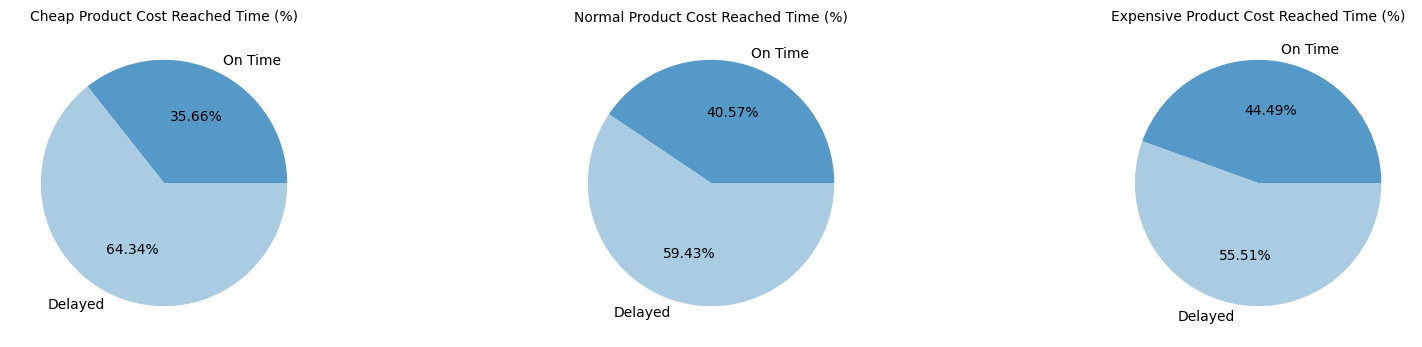

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,4))

ax1.pie(df[df['Cost_class'] == 'cheap'].groupby('Reached.on.Time_Y.N')['Mode_of_Shipment'].count().values, labels = ['On Time', 'Delayed'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')
ax2.pie(df[df['Cost_class'] == 'normal'].groupby('Reached.on.Time_Y.N')['Mode_of_Shipment'].count().values, labels = ['On Time', 'Delayed'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')
ax3.pie(df[df['Cost_class'] == 'expensive'].groupby('Reached.on.Time_Y.N')['Mode_of_Shipment'].count().values, labels = ['On Time', 'Delayed'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')

ax1.set_title('Cheap Product Cost Reached Time (%)', fontsize=10)
ax2.set_title('Normal Product Cost Reached Time (%)', fontsize=10)
ax3.set_title('Expensive Product Cost Reached Time (%)', fontsize=10)

plt.show()

Disini kita bisa menyimpulkan bahwa perusahaan ternyata lebih melihat *cost product*-nya dibandingkan dengan *product importance*. Sekarang mari kita lihat dari mode pengirimannya.

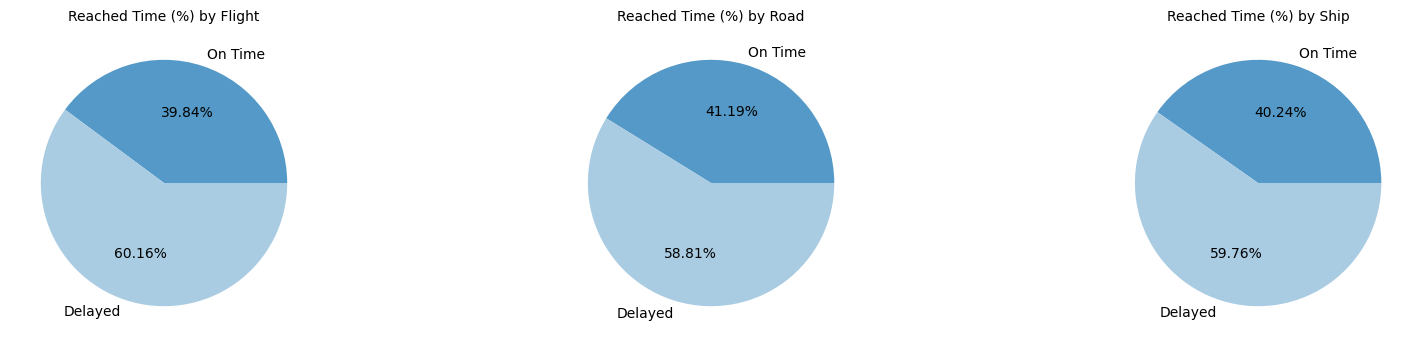

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,4))

ax1.pie(df[df['Mode_of_Shipment'] == 'Flight'].groupby('Reached.on.Time_Y.N')['Cost_class'].count().values, labels = ['On Time', 'Delayed'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')
ax2.pie(df[df['Mode_of_Shipment'] == 'Road'].groupby('Reached.on.Time_Y.N')['Cost_class'].count().values, labels = ['On Time', 'Delayed'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')
ax3.pie(df[df['Mode_of_Shipment'] == 'Ship'].groupby('Reached.on.Time_Y.N')['Cost_class'].count().values, labels = ['On Time', 'Delayed'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')

ax1.set_title('Reached Time (%) by Flight', fontsize=10)
ax2.set_title('Reached Time (%) by Road', fontsize=10)
ax3.set_title('Reached Time (%) by Ship', fontsize=10)

plt.show()

Jika dilihat dari presentase, justru pengiriman *by flight* yang lebih banyak delayed, walaupun perbedaannya tipis antar mode pengiriman. Mari kita lihat median biaya produk berdasarkan mode pengiriman.

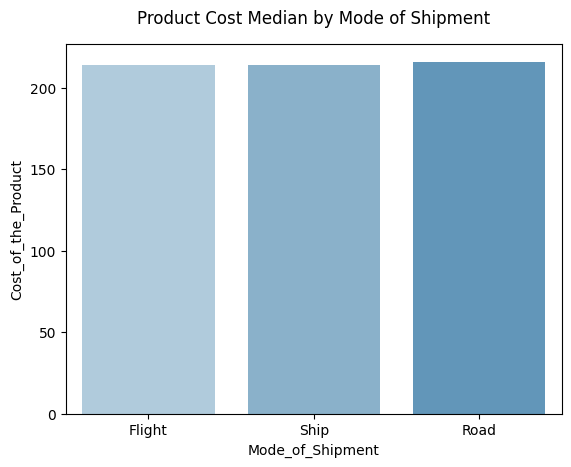

In [57]:
sns.barplot(data=df, x='Mode_of_Shipment', y='Cost_of_the_Product', estimator=np.median, errorbar=('ci', 0), palette=['#A9CCE3','#7FB3D5','#5499C7'])
plt.title('Product Cost Median by Mode of Shipment', pad=15)
plt.show()

Jika dilihat dari bar chart, median antara 3 mode pengiriman tidak jauh berbeda. Mari kita uji dengan metode Kruskal Wallis.

Hipotesis :
- Ho : Median dari ketiga mode pengiriman adalah SAMA
- Ha : Minimal ada 1 mode pengiriman yang mediannya berbeda. Tetapi kita tidak tahu yang mana.

In [58]:
from scipy.stats import kruskal

In [59]:
stat, pvalue = kruskal(
    df[df['Mode_of_Shipment']=='Flight']['Cost_of_the_Product'],
    df[df['Mode_of_Shipment']=='Road']['Cost_of_the_Product'],
    df[df['Mode_of_Shipment']=='Ship']['Cost_of_the_Product']
)

pvalue

0.7677956166852757

In [60]:
if pvalue > 0.05 :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal salah satu mode pengiriman ada yang median biaya produknya berbeda.
    ''')
else :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa minimal salah satu mode pengiriman ada yang median biaya produknya berbeda.
    ''') 


    pvalue = 0.76780. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal salah satu mode pengiriman ada yang median biaya produknya berbeda.
    


In [61]:
df.groupby('Mode_of_Shipment')['Cost_of_the_Product'].median()

Mode_of_Shipment
Flight    214.0
Road      216.0
Ship      214.0
Name: Cost_of_the_Product, dtype: float64

**INSIGHT 7**
****
- Semakin mahal sebuah produk, semakin besar kemungkinan produk untuk sampai tepat waktu.
- Mode pengiriman jalur udara memiliki presentase *delayed* lebih besar dibandingkan yang lainnya. Hal ini karena perusahaan lebih memilih jalur udara untuk produk dengan high dan medium importance. Padahal perusahaan juga tidak terlalu memprioritaskan kedua produk tersebut.
- Berdasarkan hasil tes kruskal wallis, kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal salah satu mode pengiriman ada yang median biaya produknya berbeda. Kita bisa asumsikan bahwa median biaya produk di semua mode pengiriman adalah sama.
- Berdasarkan groupby, kita bisa tahu bahwa hanya *road* yang berbeda mediannya sebesar 216, dan paling tinggi diantara yang lainnya.
- Produk yang mahal justru lebih banyak memakai mode pengiriman jalur darat. Hal ini membuat mode darat memiliki presentase tepat waktu lebih tinggi dibandingkan yang lainnya.

Mari kita lihat rating pelanggan berdasarkan biaya produk dan korelasi biaya terhadap fitur lain.

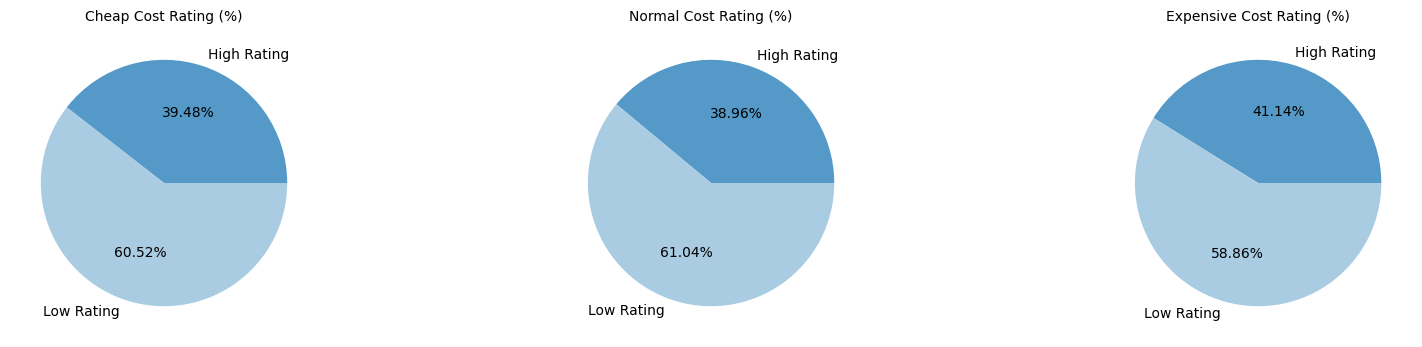

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,4))

ax1.pie(df[df['Cost_class'] == 'cheap'].groupby('Rating_class')['Mode_of_Shipment'].count().values, labels = ['High Rating', 'Low Rating'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')
ax2.pie(df[df['Cost_class'] == 'normal'].groupby('Rating_class')['Mode_of_Shipment'].count().values, labels = ['High Rating', 'Low Rating'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')
ax3.pie(df[df['Cost_class'] == 'expensive'].groupby('Rating_class')['Mode_of_Shipment'].count().values, labels = ['High Rating', 'Low Rating'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')

ax1.set_title('Cheap Cost Rating (%)', fontsize=10)
ax2.set_title('Normal Cost Rating (%)', fontsize=10)
ax3.set_title('Expensive Cost Rating (%)', fontsize=10)

plt.show()

In [63]:
df_corr = df.corr(numeric_only=True, method='spearman')[['Cost_of_the_Product']].sort_values(by='Cost_of_the_Product')
df_corr

,Cost_of_the_Product
Weight_in_gms,-0.131980
Discount_offered,-0.115817
Reached.on.Time_Y.N,-0.071850
Product_importance_num,-0.043801
Customer_rating,0.010242
Prior_purchases,0.194216
Customer_care_calls,0.293700
Cost_of_the_Product,1.000000


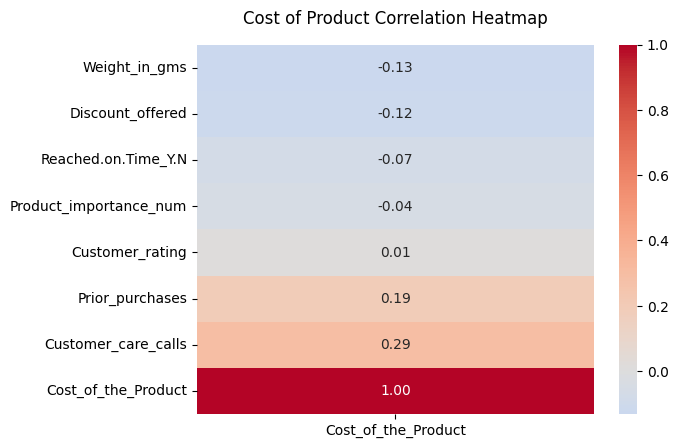

In [64]:
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Cost of Product Correlation Heatmap', pad=15)
plt.show()

**INSIGHT 8**
****
- Hal ini terbukti dengan rating pelanggan yang lebih banyak memberikan rating tinggi saat barang yang dibeli tergolong mahal.
- Dari heatmap, kita bisa lihat bahwa *cost of product* punya korelasi positif paling kuat dengan *customer care calls*. Semakin mahal barang, semakin sering pelanggan akan menelfon.
- Fitur *cost of product* juga punya korelasi positif dengan *prior purchase*. Dimana semakin sering pelanggan membeli di perusahaan itu, semakin mahal produk yang pelanggan beli.
- Fitur *cost of product* juga punya korelasi negatif dengan *weight* dan *discount offered*. Semakin berat produk dan semakin besar diskon produk, maka akan semakin murah produk yang pelanggan beli.

### **Analisis Segmentasi Pelanggan**

Karena kita sudah tahu bahwa biaya produk ada korelasinya dengan *prior purchase* dimana itu adalah seberapa sering pelanggan membeli barang elektronik di perusahaan itu, mari kita lihat analisis dari sisi segmentasi pelanggan.

In [65]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_class,Discount_class,Weight_class,Rating_class,Call_intensity,Product_importance_num
0,D,Flight,4,2,177,3,low,F,44,1233,1,normal,40-52(%),light,low rating,moderate,1
1,E,Flight,4,5,216,2,low,M,59,3088,1,normal,53-65(%),medium,high rating,moderate,1
2,A,Flight,2,2,183,4,low,M,48,3374,1,normal,40-52(%),medium,low rating,few,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1,normal,1-13(%),light,low rating,few,2
4,C,Flight,2,2,184,3,medium,F,46,2484,1,normal,40-52(%),medium,low rating,few,2


In [66]:
# bagi dulu kedalam 3 kelas member pelanggan, 2-3 premium, 4-5 golden, 6-7 platinum
df['customer_segment'] = ['Premium' if (x<=3) else 'Platinum' if (x>=7) else 'Golden' for x in df['Prior_purchases'].values]

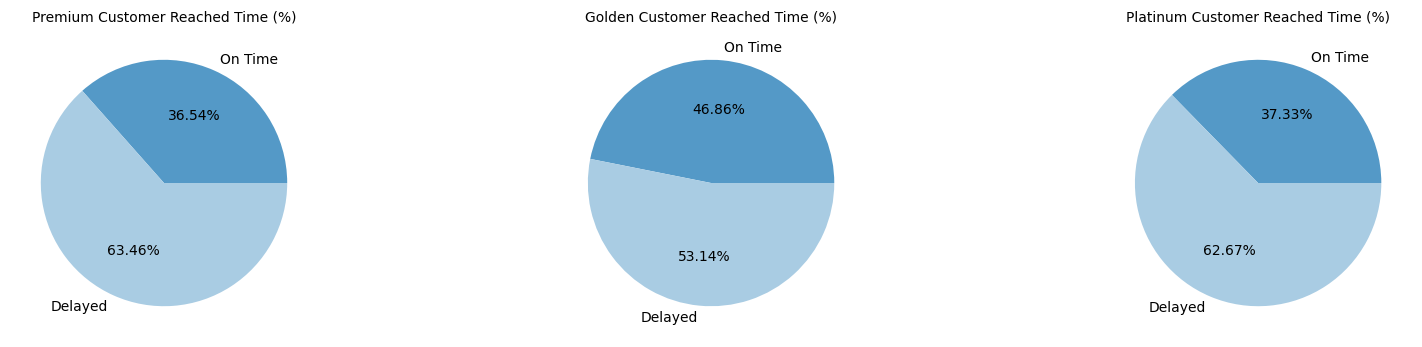

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,4))

ax1.pie(df[df['customer_segment'] == 'Premium'].groupby('Reached.on.Time_Y.N')['Cost_class'].count().values, labels = ['On Time', 'Delayed'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')
ax2.pie(df[df['customer_segment'] == 'Golden'].groupby('Reached.on.Time_Y.N')['Cost_class'].count().values, labels = ['On Time', 'Delayed'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')
ax3.pie(df[df['customer_segment'] == 'Platinum'].groupby('Reached.on.Time_Y.N')['Cost_class'].count().values, labels = ['On Time', 'Delayed'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')

ax1.set_title('Premium Customer Reached Time (%)', fontsize=10)
ax2.set_title('Golden Customer Reached Time (%)', fontsize=10)
ax3.set_title('Platinum Customer Reached Time (%)', fontsize=10)

plt.show()

Mari kita eksplorasi dari diskon yang diberikan kepada pelanggan sesuai dengan segmentasinya.

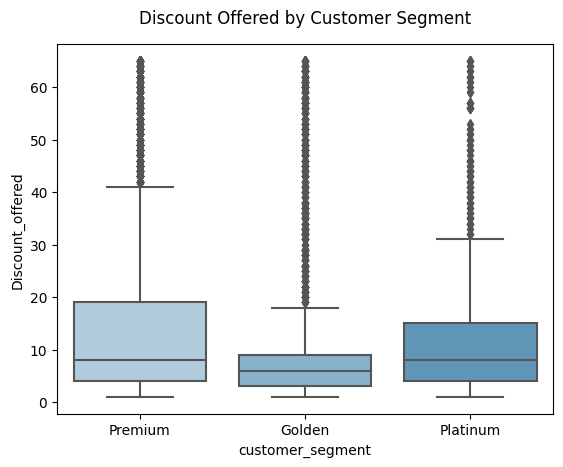

In [68]:
sns.boxplot(data=df, x='customer_segment', y='Discount_offered', palette=['#A9CCE3','#7FB3D5','#5499C7'])
plt.title('Discount Offered by Customer Segment', pad=15)
plt.show()

Mari kita lihat *spending* dari masing-masing segmentasi pelanggan.

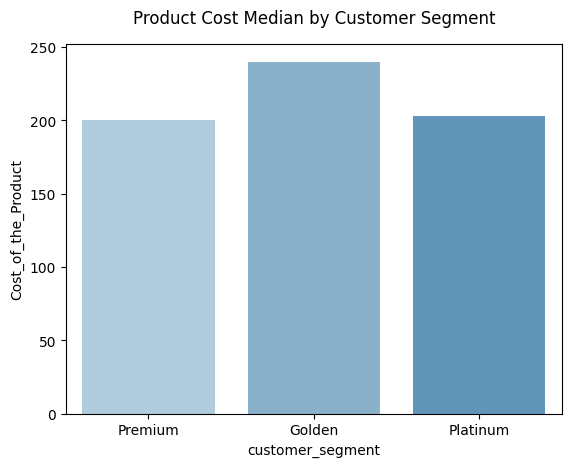

In [69]:
sns.barplot(data=df, x='customer_segment', y='Cost_of_the_Product', estimator=np.median, errorbar=('ci', 0), palette=['#A9CCE3','#7FB3D5','#5499C7'])
plt.title('Product Cost Median by Customer Segment', pad=15)
plt.show()

Mari kita lihat *rating* yang diberikan oleh masing-masing segmentasi pelanggan.

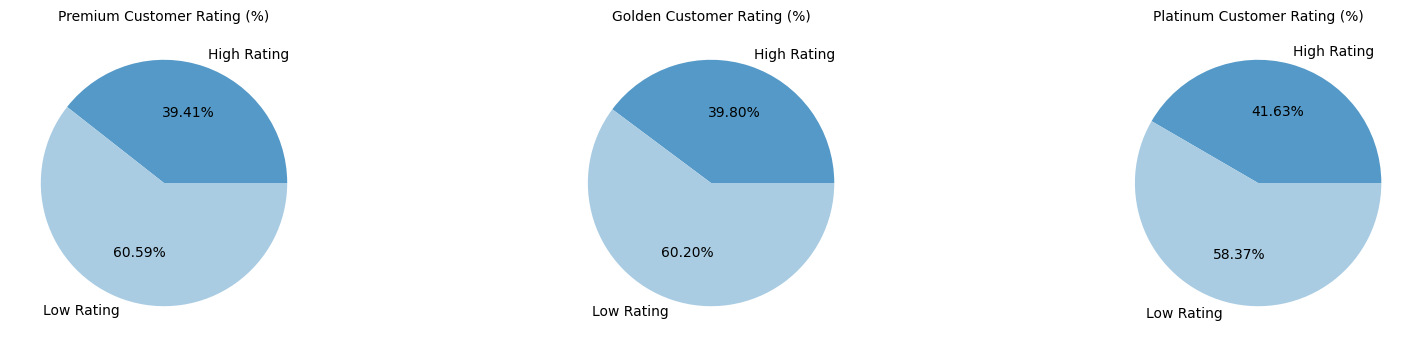

In [70]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,4))

ax1.pie(df[df['customer_segment'] == 'Premium'].groupby('Rating_class')['Mode_of_Shipment'].count().values, labels = ['High Rating', 'Low Rating'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')
ax2.pie(df[df['customer_segment'] == 'Golden'].groupby('Rating_class')['Mode_of_Shipment'].count().values, labels = ['High Rating', 'Low Rating'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')
ax3.pie(df[df['customer_segment'] == 'Platinum'].groupby('Rating_class')['Mode_of_Shipment'].count().values, labels = ['High Rating', 'Low Rating'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')

ax1.set_title('Premium Customer Rating (%)', fontsize=10)
ax2.set_title('Golden Customer Rating (%)', fontsize=10)
ax3.set_title('Platinum Customer Rating (%)', fontsize=10)

plt.show()

**INSIGHT 9**
****
- Kita bisa lihat bahwa customer dengan member golden (4-5x prior purchase) punya presentase *on time* lebih tinggi dibanding yang lain. Karena diskon yang diberikan kepada mereka lebih rendah dibandingkan member premium dan platinum.
- Selain itu, member golden juga membeli barang yg relatif lebih mahal dibanding member premium (baru) dan lama (platinum).
- Walaupun begitu, justru member platinum lebih banyak memberikan *high rating* dibanding member premium maupun golden.

### **Analisis Panggilan Layanan Pelanggan**

Yang terakhir kita akan analisis dari sisi panggilan layanan pelanggan.

Mari kita lihat korelasi *customer care calls*.

In [71]:
df_corr = df.corr(numeric_only=True, method='spearman')[['Customer_care_calls']].sort_values(by='Customer_care_calls')
df_corr

,Customer_care_calls
Weight_in_gms,-0.232936
Discount_offered,-0.104223
Reached.on.Time_Y.N,-0.064283
Product_importance_num,-0.052884
Customer_rating,0.011862
Prior_purchases,0.272992
Cost_of_the_Product,0.293700
Customer_care_calls,1.000000


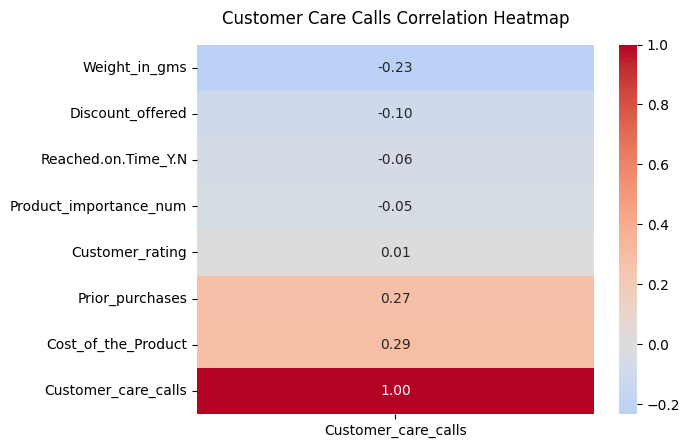

In [72]:
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Customer Care Calls Correlation Heatmap', pad=15)
plt.show()

**INSIGHT 10**
****
- Kalau dilihat dari heatmap, customer calls punya korelasi cukup tinggi dengan cost product, prior purchase, dan weight in gms.
- Semakin mahal produk, semakin banyak call dari customer untuk menanyakan detail pengiriman produknya.
- Semakin lama customer, semakin sering juga callnya. Karena barangnya semakin mahal. Bisa dilihat di korelasi priori purchase dan cost of product.
- Semakin ringan beratnya, semakin sering juga callnya. Karena barang ringan cenderung lebih lama sampainya.


Mari kita lihat rating pelanggan berdasarkan call intensity dan kita bandingkan dengan reached time.

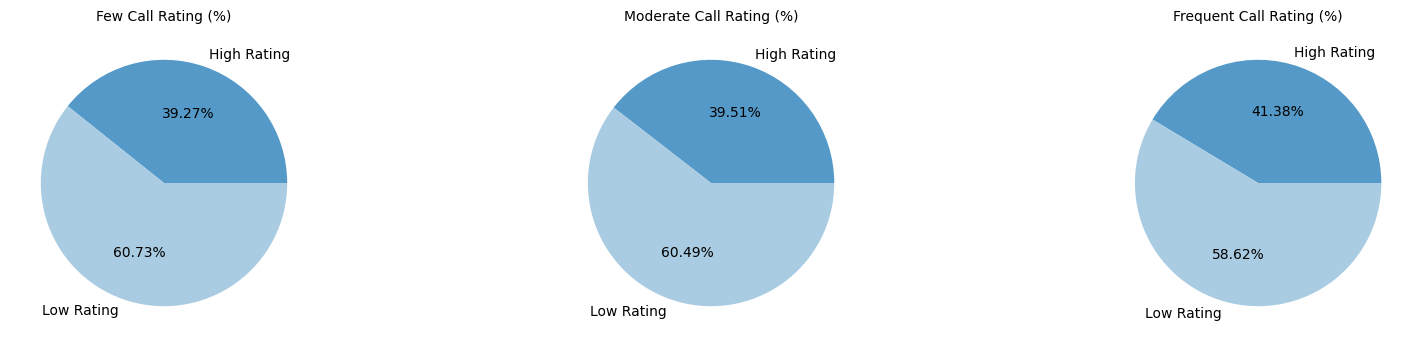

In [73]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,4))

ax1.pie(df[df['Call_intensity'] == 'few'].groupby('Rating_class')['Mode_of_Shipment'].count().values, labels = ['High Rating', 'Low Rating'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')
ax2.pie(df[df['Call_intensity'] == 'moderate'].groupby('Rating_class')['Mode_of_Shipment'].count().values, labels = ['High Rating', 'Low Rating'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')
ax3.pie(df[df['Call_intensity'] == 'frequent'].groupby('Rating_class')['Mode_of_Shipment'].count().values, labels = ['High Rating', 'Low Rating'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')

ax1.set_title('Few Call Rating (%)', fontsize=10)
ax2.set_title('Moderate Call Rating (%)', fontsize=10)
ax3.set_title('Frequent Call Rating (%)', fontsize=10)

plt.show()

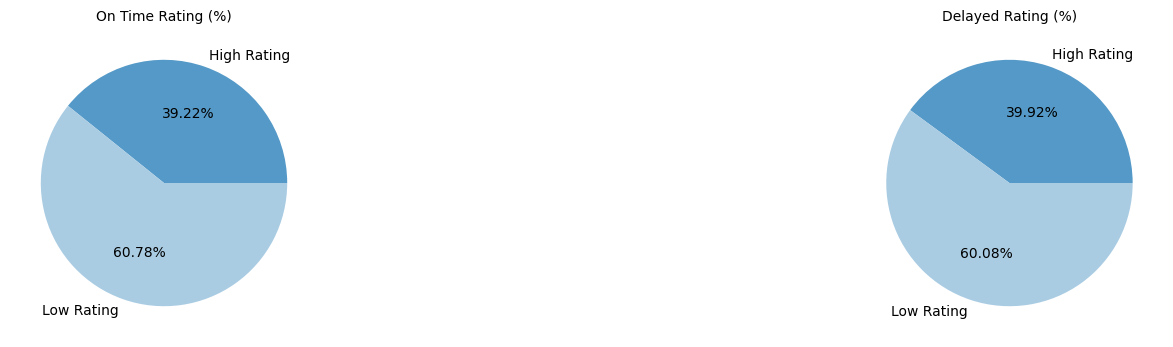

In [74]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,4))

ax1.pie(df[df['Reached.on.Time_Y.N'] == 0].groupby('Rating_class')['Mode_of_Shipment'].count().values, labels = ['High Rating', 'Low Rating'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')
ax2.pie(df[df['Reached.on.Time_Y.N'] == 1].groupby('Rating_class')['Mode_of_Shipment'].count().values, labels = ['High Rating', 'Low Rating'], colors = ['#5499C7','#A9CCE3'], autopct='%.2f%%')

ax1.set_title('On Time Rating (%)', fontsize=10)
ax2.set_title('Delayed Rating (%)', fontsize=10)

plt.show()

In [78]:
df_corr = df.corr(numeric_only=True, method='spearman')[['Customer_rating']].sort_values(by='Customer_rating')
df_corr

,Customer_rating
Weight_in_gms,-0.004803
Discount_offered,-0.002299
Product_importance_num,0.004373
Cost_of_the_Product,0.010242
Prior_purchases,0.010537
Customer_care_calls,0.011862
Reached.on.Time_Y.N,0.013108
Customer_rating,1.000000


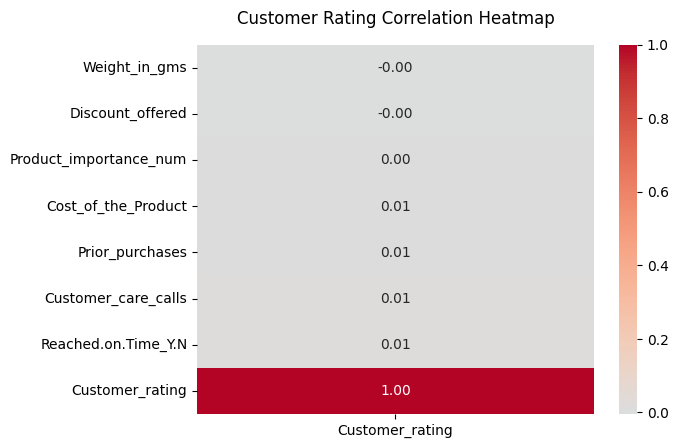

In [80]:
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Customer Rating Correlation Heatmap', pad=15)
plt.show()

**INSIGHT 11**
****
- Produk yang *delayed* justru memiliki presentase *high rating* yg sedikit lebihi tinggi dibandingkan dengan *on time*.
- Hal ini terjadi karena ternyata karena lebih banyak barang yg *delayed* dari pada *on time*.
- Namun disini kita juga bisa simpulkan bahwa semakin perusahaan menjawab *call customer*, semakin customer berpeluang untuk memberikan rating yang lebih tinggi.
- Walaupun jika kita lihat di korelasi customer rating, hampir tidak ada korelasinya sama sekali dengan fitur lain. Tapi ada sedikit korelasi positif dengan prior purchase, customer calls, dan reached on time.

****
# **Kesimpulan**
****
1. Sebanyak 59.67% produk datang terlambat dan 40.33% produk datang tepat waktu.
2. Produk yang jumlah kedatangan tepat waktunya lebih tinggi  adalah produk dengan beban berat dan produk dengan diskon dibawah 13%. 
3. Produk terlalu menumpuk di satu Warehouse saja.
4. Klasifikasi parameter kepentingan/urgensi produk tidak jelas berdasarkan apa.
5. Perusahaan lebih memprioritaskan barang dengan harga tinggi dibandingkan dengan yang kepetingan/urgensinya tinggi.
6. Mode pengiriman juga terlalu berfokus pada satu mode, yaitu dengan kapal karena lebih murah.
7. Mode pengiriman pesawat mengalami presentase keterlambatan yang lebih banyak dibandingkan dengan mode lain. Disusul kedua oleh mode kapal dengan perbedaan sekitar 0.4%.
8. Produk yang mahal justru lebih banyak memakai mode pengiriman jalur darat. Hal ini membuat mode darat memiliki presentase tepat waktu lebih tinggi dibandingkan yang lainnya.
9. Pelanggan dengan member golden membeli lebih banyak produk mahal, namun justru yang memberikan presentase rating tinggi terbanyak adalah pelanggan dengan member platinum.
10. Customer rating sebenarnya tidak berkorelasi dengan semua kolom. Namun ada sedikit korelasi menuju 0 yang dapat dipertimbangkan, yaitu banyaknya perusahaan menerima call, pelanggan yang memiliki member platinum, dan harga produk yang mahal mempengaruhi kenaikan rating.

****
# **Rekomendasi**
****
1. Jika perusahaan tidak bisa memastikan pengiriman tepat waktu, perusahaan tidak usah memberikan diskon diatas 13%. Fokus ke perihal lain selain diskon.
2. Sebarlah produk di berbagai gudang, jangan hanya menumpuk di satu gudang saja. Akan berdampak pada antrian pengiriman.
3. Memperbaiki kebijakan terkait *product importance* karena masih belum jelas.
4. Kami merekomendasikan beberapa alternatif terkait kebijakan pemilihan *product importance*:
   1. Diukur dari Harga Barang. Jika barang mahal dikategorikan sebagai produk penting (*high importance*), dan perusahaan fokus dalam menangani produk tersebut, tingkat kepercayaan pelanggan akan semakin meningkat, rating juga akan meningkat.
   2. Diukur dari Destinasi Pengiriman. Produk dikategorikan berdasarkan destinasi pengiriman domestik maupun internasional. Jika pengiriman destinasinya internasional, produk bisa lebih diprioritaskan karena butuh waktu lebih lama unutk pengiriman.
   3. Diukur dari Opsi Pengiriman. Produk dikategorikan berdasarkan opsi pengiriman berbayar atau gratis ongkir. Jika memang berbayar bisa lebih diprioritaskan. Jika pengiriman gratis ongkir, pelanggan harus diberikan durasi waktu yang ditentukan untuk pengiriman produk mereka untuk menghindari pelanggan menelepon (*customer care call*) untuk menanyakan tentang pengiriman.
5. Pertahankan untuk sering menjawab *customer care calls*, *chance* rating tinggi semakin besar, walaupun barangnya sampai tidak tepat waktu.
6. Menjaga ketepatan waktu delivery kepada existing customers (golden dan platinum), karena merekalah yang berpeluang besar memberikan rating tinggi.